# EDA - GEDA Proyecto DIABETIA
## Estancia de investigación Maestría de Ciencia de Datos
## Aide Jazmín González Cruz


### 1. Carga de librerías

In [122]:
import pandas as pd
import numpy as np
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(dirname('../src'))
from src.utils import utils

### 2. Carga de datos

In [3]:
df = pd.read_csv("../Data/Muestra.csv")
df.head(5)

,newid,cx_curp,nota_medica,glucosa,colesterol,trigliceridos,hdl,ldl,fecha,presion_arterial,...,fechas_procesadas,bandera_fechas_procesadas,fuente,in_consulta,fecha_nacimiento,sexo,medicamentos,codigos_cie,diagnosticos,fecha_consulta
0,4593753CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,135,NaN,NaN,NaN,NaN,NaN,120/60,...,NaN,NaN,corhis_somatometria,4593753,1951-12-09,F,FLUOXETINA CAPSULA O TABLETA CADA CAPSULA O TA...,NaN,NaN,2014-12-29 09:02:48.167
1,2502589CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,131,NaN,NaN,NaN,NaN,NaN,130/80,...,NaN,NaN,corhis_somatometria,2502589,1951-12-09,F,"COMPLEJO B| METFORMINA, TABLETAS, METFORMINA, ...",NaN,NaN,2010-12-21 10:58:00.640
2,6253338CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,148,NaN,NaN,NaN,NaN,NaN,120/80,...,NaN,NaN,corhis_somatometria,6253338,1951-12-09,F,INSULINA HUMANA ACCION INTERMEDIA NPH SUSPENSI...,NaN,NaN,2017-10-16 10:09:10.830
3,6866604CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130/70,...,NaN,NaN,corhis_somatometria,6866604,1951-12-09,F,FLUOXETINA CAPSULA O TABLETA CADA CAPSULA O TA...,NaN,NaN,2018-11-02 10:22:01.733
4,2870758CAAE51120998X96PC1,CAAE51120998X96PC1,ELIZABET DE 59.9 AÑOS EDAD---ACUDE A EVALCUION...,126,NaN,NaN,NaN,NaN,SEPTIEMBRE DEL 2011,NaN,...,2011-09-01 00:00:00,1.0,NER,2870758,1951-12-09,F,COMPLEJO B| PRAVASTATINA. TABLETAS. CADA TABLE...,E119,Diabetes tipo II,2011-10-08 09:47:14.953


### 3. EDA

#### Obteniendo información general del dataset

- Filas y columnas

In [4]:
df.shape

(9315, 32)

- Columnas y tipo de columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   newid                            9315 non-null   object 
 1   cx_curp                          9315 non-null   object 
 2   nota_medica                      2359 non-null   object 
 3   glucosa                          3926 non-null   object 
 4   colesterol                       2311 non-null   float64
 5   trigliceridos                    2373 non-null   object 
 6   hdl                              117 non-null    float64
 7   ldl                              85 non-null     float64
 8   fecha                            1924 non-null   object 
 9   presion_arterial                 5058 non-null   object 
 10  hba1c                            2075 non-null   object 
 11  hipertension                     379 non-null    object 
 12  plaquetas           

In [6]:
df.describe()

,colesterol,hdl,ldl,urea,peso,altura,año_de_diagnostico_hipertensión,bandera_fechas_procesadas,in_consulta
count,2311.000000,117.000000,85.000000,195.000000,4995.000000,4993.000000,161.000000,2359.000000,9.315000e+03
mean,47.712882,39.705812,104.444706,86.038564,68.783568,1.500649,2004.993789,0.401441,2.824811e+06
std,86.591415,11.692045,37.440014,108.769750,20.514289,0.322613,5.175057,0.490294,1.901302e+06
min,0.000000,20.000000,22.800000,14.000000,0.000000,0.000000,1997.000000,0.000000,1.326000e+03
25%,0.000000,35.000000,88.000000,31.500000,60.000000,1.500000,2000.000000,0.000000,1.356846e+06
50%,0.000000,40.000000,110.000000,57.000000,72.000000,1.540000,2006.000000,0.000000,2.378026e+06
75%,0.000000,48.000000,131.000000,89.000000,82.000000,1.640000,2009.000000,1.000000,4.184385e+06
max,351.000000,73.000000,171.000000,545.000000,140.000000,1.840000,2018.000000,1.000000,8.273014e+06


In [7]:
df.rename(columns = {'año_de_diagnostico_hipertensión':'año_de_diagnostico_hipertension'}, inplace = True)

In [8]:
prop_codigo = df.groupby(['newid'], as_index=False)['cx_curp']\
.count()\
.rename(columns={'cx_curp': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,newid,count,prop
3338,4599420CAAJ770616UNX3HRC2,15,0.001610
3394,4689106CAAJ770616UNX3HRC2,15,0.001610
3365,4643965CAAJ770616UNX3HRC2,15,0.001610
3315,4556722CAAJ770616UNX3HRC2,15,0.001610
3420,4733395CAAJ770616UNX3HRC2,14,0.001503
...,...,...,...
2185,2881478DIJC38112055K14KA2,1,0.000107
2187,2885516OOCG680408JBU4ERC2,1,0.000107
2188,288673ZACF481001A5LI4QC1,1,0.000107
2189,2887422MAVC341201G0YJFRC1,1,0.000107


In [9]:
prop_codigo = df.groupby(['cx_curp'], as_index=False)['newid']\
.count()\
.rename(columns={'newid': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,cx_curp,count,prop
6,CAAJ770616UNX3HRC2,602,0.064627
15,DIRL630201M8ADARC1,452,0.048524
28,MAVC341201G0YJFRC1,358,0.038433
1,AADV5603014KS44QC1,356,0.038218
50,VEVF4904172GTC8QC1,340,0.036500
10,COGJ5108018PI47QC1,316,0.033924
20,GOML440127J80Z9PC2,309,0.033172
54,ZEPL5503219FZQ6QC2,307,0.032958
38,PEGO194405B3QH4QC1,239,0.025658
47,SOLG360601I3NUBIA1,237,0.025443


In [10]:
df.glucosa.unique()

array(['135', '131', '148', nan, '126', '127|0', '110', '162|0', '132',
       '120', '239', '123', '178', '113', '124', '140', '128', '137',
       '199', '159', '162', '130', '212', '145', '133', '169', '218',
       '100', '156', '158', '125', '0|0', '530', '200|0', '255', '250|0',
       '80', '316', '170|0', '200', '208|0', '316|0', '130|0', '234',
       '260|0', '201', '283', '160|0', '140|0', '98', '160', '195',
       '100|130', '405|0', '158|0', '152', '309', '120|0', '217|0', '190',
       '88', '0|121', '300|0', '108', '344', '240|0', '126|0', '163',
       '163|0', '182', '182|0', '180|0', '302|0', '205', '205|0',
       '262|11', '185|0', '153', '198|0', '177|0', '291|0', '228|0',
       '400', '290|0', '193', '270|0', '100|0', '152|0', '87|0', '275',
       '344|0', '178|0', '170', '0|98', '324|0', '262|0', '192|0', '150',
       '120|9', '110|0', '108|0', '115|0', '239|351', '138', '150|0',
       '97|0', '138|0', '115', '144', '177', '164', '104|0', '116',
       '102|

In [11]:
df.colesterol.unique()

array([   nan,   0.  , 163.  , 191.  , 123.  , 250.  , 199.  , 244.  ,
       129.  , 154.  , 151.  , 139.  , 251.  , 124.  , 277.  , 195.  ,
       273.  , 202.  , 206.  ,  80.  , 287.  , 230.  , 187.  , 204.  ,
       268.  , 271.  , 220.  , 280.  , 215.  , 150.  , 200.  , 161.  ,
       172.  , 235.  , 211.  , 201.  , 193.  , 228.  , 196.  , 185.  ,
       254.  ,  93.  , 247.43, 184.  , 173.  , 288.  , 246.  , 261.  ,
       266.  , 257.  , 281.  , 177.  , 294.  , 171.  , 207.  , 231.  ,
       152.  , 108.  , 135.  , 130.  , 180.  , 166.  , 186.  , 168.  ,
       137.  , 197.  , 132.  , 189.  , 219.  , 222.  ,  95.  , 214.  ,
       351.  , 259.  , 262.  , 279.  , 128.7 , 170.  , 140.  , 181.  ,
       104.  , 119.  , 225.  , 286.  , 233.  , 241.  , 274.  , 319.  ,
       165.  , 208.  ,  88.27, 162.  , 178.  , 113.  , 242.  , 156.  ,
       198.  , 216.  ,  40.  , 143.  , 164.  , 179.  , 208.8 , 126.  ,
       192.9 , 296.  , 190.  , 188.  , 209.  , 175.  , 167.  , 159.  ,
      

In [12]:
df.trigliceridos.unique()

array([nan, '0', '274', '386', '625', '295', '384', '284', '283', '738',
       '189', '256', '604', '285', '347', '252', '319', '230', '796',
       '341', '694', '580', '752', '320', '402', '150', '426', '349',
       '205', '215', '380', '272', '329', '352', '521', '257', '278',
       '200', '158', '103', '294', '196', '153', '96', '198', '102',
       '141', '122', '156', '217', '186', '118', '129', '93', '133',
       '123', '97.7', '361', '337', '247', '264', '1332', '701', '1241',
       '250', '416', '218', '137', '148', '140', '220', '222', '111',
       '154', '182,', '182', '180', '184', '168', '181', '173', '237',
       '147', '159', '178', '424', '242', '288', '440', '160', '92',
       '485', '520', '120', '177', '166', '136', '136.8', '464', '246',
       '142', '365', '95', '104', '172', '114', '290', '63', '134', '229',
       '260', '298', '176', '76', '82', '179', '130', '135', '152', '245',
       '225', '345', '342', '268', '545', '70', '224', '296', '997',
     

In [13]:
df.hdl.unique()

array([  nan, 48.  , 47.  , 51.  , 46.  , 41.  , 37.  , 36.  , 40.  ,
       48.7 , 20.4 , 28.24, 20.  , 21.  , 22.3 , 73.  , 53.  , 44.  ,
       43.  , 35.  , 49.  , 58.  , 38.  , 56.  ])

In [14]:
df.ldl.unique()

array([  nan,  75.6, 156. , 110. , 150. , 117. , 171. , 135. ,  70.6,
        92.8,  94. , 132. ,  33. ,  22.8, 134. ,  40. ,  88. ,  66. ,
       104. , 101. , 131. , 144. , 129. ,  89. , 120. ,  91. ,  83. ])

In [15]:
df.fecha.unique()

array([nan, 'SEPTIEMBRE DEL 2011', '07  12', '37. 22',
       '19 DE AGOSTO 2015', '06 DE AGOSTO 2015', '24 DE ENERO 2016',
       '20 DE ENERO DE 2017', 'AGOSTO DE 2018', 'MARZO DE 2019',
       'NOV DE 2019', 'DIC 2013', 'MAYO DE 2019', 'MAYO DE 2016',
       '18 DE JULIO', '4 DE JULIO', '13 SEPT 2016--', '29. JUNIO DE 2017',
       'ENERO DE 2017', '15 DE JUNIO', '12 DE MARZO DE 2017',
       '6 DE MARZO', '8 DE  DE FEBRERO   DE 2018',
       '14  DE NERO DEL 1ÑO  11', '2 DE JUNIO 2014', '15 DE DIC 2015.-',
       'MARZO DE  2019', '25 MARZO DE 2019', '19 DE JULIO 2016',
       '15 DE JUNIO DE 2016', '24/01/2014', 'ENERO DE 2020',
       '20 DE OCTUBRE DE 2014', '20 12  10', '20 SEP 2016',
       '06 DE MAYO DE 2015', '13/08/12', '27/12/12', '02/07/12',
       '09/NOV2012', '30/08/12', '29 06  13', '24 DE  ENERO  2016',
       '16/03/2016', '15/03/16', '10 10 11', '29 06 10', '10/08/2011',
       '17 11  11', '17 12 12', '8 DE SEPT', '8 DE  SEPT', '12  10001',
       '37. 00', '31  

In [16]:
df.presion_arterial.unique()

array(['120/60', '130/80', '120/80', '130/70', nan, '123/65', 'NULL/NULL',
       '125/75', '120/70', '120/82', '130/75', '120/75', '120/78',
       '120/85', '110/70', '140/70', '140/90', '140/80', '110/60',
       '115/70', '110/80', '100/60', '90/60', '150/95', '130/30',
       '116/66', '130/85', '160/95', '130/78', '123/73', '120/72',
       '137/70', '133/80', '135/75', '123/70', '121/60', '125/80',
       '100/70', '125/70', '160/100', '150/70', '120/90', '160/80',
       '120/74', '100/80', '170/70', '125/68', '200/100', '157/70',
       '125/79', '136/85', '128/80', '115/60', '160/90', '170/90',
       '135/85', '150/80', '136/74', '114/78', '120/68', '180/100',
       '123/80', '150/66', '140/100', '125/85', '130/90', '140/85',
       '137/80', '122/75', '115/80', '102/75', '125/78', '123/75',
       '90/70', '150/90', '110/81', '125/76', '104/62', '122/78',
       '118/76', '137/85', '145/100', '110/69', '120/83', '110/75',
       '145/85', '135/80', '116/79', '138/88', '121

In [17]:
df.hba1c.unique()

array([nan, '0', '11.8', '8.4', '11', '8.5', '12', '10', '7', '8', '9.5',
       '9', '6.8', '8.3', '9.4', '130/80', '140/80', '5.7', '5.4', '5.2',
       '7.7', '10.8', '8.7', '6', '8.2', '5.1', '7.8', '7.5', '9.7',
       '7.9', '7.4', '7.3', '10.0', '6.09', '6009', '8.1', '6.7', '6.6',
       '6.3'], dtype=object)

In [18]:
df.hipertension.unique()

array([nan, 'HIPERTENSION ARTERIAL', 'HOPY', 'HAS', 'HIPERTENSA',
       'HIPERTENSIÓN,', 'HIEPRTENSION ARTERIAL', 'HIPERTENSION', 'HTAS',
       'HIPERTENSO', 'HIPERTENSION ARETRIAL', '.HAS',
       'HIPERTENSIÓN ARTERIAL SISTEMICA  DE 30  AÑOS DE EVOLUCION,',
       'HIPERTENSION ARTERIAL CONTROLADO, NO REFIERE SINTOMAS URINARIOS.',
       'HIPERTENSION   CON INCONTINENCIA  URINARIA    NO PORTA  LA CONTRARERERENCIA  MANIFIESTA  ULTIMOS LABOARTORIO HACE    MAS  DE  18 MESES  NO PORTA CONTRAREFERENCIA  DE UROLOGIA   PRESENTA    POLIFAGIA  POLIDIPSIA  POLIURIA  NO   CEFALEA   ACUFENOS  FOSFENOS    VISION BORROSA  EN     PERIFERIA  SOLO   VE  BIE EN EL CENTRO DE EL OJO   DERECHO PARESTESIA EN PIERNAS   A A EXPLORACION BUENA COLLORACIODN EPIEL Y TEGUMENTOS OFTALMOSCIOPIA  CON OPACIDA  LEVE  EN AMBOS OJOS  NO  SE OBSERVA OTRAS LESINES   CARDIOPULMONAR NORMAL ABDOMEN BLANDO DEPRESIBLENO DOLOROSMIEMBROSNO EDEMA  CON   VENAS VARICOSAS  PULOS NORMALES SE    ORIENTA  EN DIETA  HIPOSODICA HIPOCA

In [19]:
df.plaquetas.unique()

array([nan, '360', '439', '362', '475 000', '364 000', '394', '408 000',
       '292', '207', '270', '279', '291', '273', '293', '263', '269',
       '253000', '298', '337', '297', '294', '268', '231', '242', '219',
       '204', '215', '123', '130', '90.5', '209', '457', '119', '321',
       '122,000', '173000', '226', '175', '180', '248', '258', '260',
       '200', '613', '235', '179', '286', '253', '184', '265', '205,000',
       '317', '259 000', '296', '262,000', '136', '71', '305 000', '314',
       '278', '257', '249', '305', '329 000', '302 000', '120', '331',
       '3 09', '308', '309', '302', '250', '244', '220', '304', '198',
       '355', '352,000', '228000', '241000'], dtype=object)

In [20]:
df.creatinina.unique()

array([nan, '1', '1.4', '2.1', '1,4', '1.7', '1.6', '0.8', '1,.1', '1.5',
       '1.3', '1.1', '0.6', '0.7', '1.0', '0.9', '0.5', '0.87', '0.-5',
       '1.2', '80', '0.65', '1.54', '2.7', '4.3', '1.8', '3.2', '0.89',
       '8.6', '11', '6.6', '8.8', '7.9', '2.5', '.6', '0.50', '0.90',
       '.9', '22', '2.2', '3', '4.2'], dtype=object)

In [21]:
df.acido_urico.unique()

array([nan, '3.9', '4.8', '8.1', '5.3', '7.8', '5.6', '3.5', '5', '6.5',
       '6.4', '6.9', '5.5', '5.2', '6.8', '4.-4', '5.1', '5.0', '6.3',
       '3.7', '7.4', '7.1', '5.9', '6.1', '3.3', '3.4', '7.7', '7.5',
       '4.2', '8.7', '6.6', '9.5', '8', '8.1TCOPLESTROL', '5.7', '4.29',
       '6', '5.4', '4.4', '9.1', '6.0', '4.9', '4.0', '4.7', '15', '2.1',
       '8.4', '3.8', '4.3', '3.0', '2.7', '4.6', '7.2', '7,COLEST'],
      dtype=object)

In [22]:
df.urea.unique()

array([   nan,  55.  ,  86.  ,  89.  ,  98.  , 126.  ,  64.  ,  24.2 ,
        43.  ,  34.4 ,  31.5 , 228.  ,  19.  ,  38.  ,  30.  ,  34.7 ,
        36.2 ,  24.  ,  94.  ,  62.  ,  41.  ,  35.4 ,  51.6 , 155.4 ,
       112.  , 140.  ,  57.  ,  58.  ,  35.1 ,  46.3 ,  45.1 ,  40.8 ,
        32.  ,  22.3 ,  41.29,  35.69, 545.  ,  31.  ,  18.2 ,  46.9 ,
        47.  ,  48.  ,  44.4 ,  67.  , 114.19,  66.4 , 139.  ,  81.96,
        72.78,  22.  ,  34.  ,  33.52,  35.  ,  29.  ,  26.  ,  14.  ,
        28.  , 136.  ,  27.3 ,  30.1 ,  39.9 ])

In [23]:
df.peso.unique()

array([ 61.  ,  63.  ,  69.  ,  76.  ,    nan,  65.  ,  64.  ,  67.  ,
         0.  ,  68.  ,  61.5 ,  70.  ,  69.6 ,  60.  ,  64.5 ,  67.4 ,
        66.9 ,  60.5 ,  67.5 ,  62.  ,  67.7 ,  69.5 ,  68.3 ,  69.7 ,
        63.5 ,  86.  ,  87.  ,  91.  ,  77.5 ,  92.  ,  77.  ,  89.  ,
        94.  ,  82.  ,  92.5 ,  95.  ,  80.  ,  86.5 ,  93.  ,  78.5 ,
        84.5 ,  98.5 ,  79.  ,  83.5 ,  89.5 ,  74.5 ,  84.  ,  94.5 ,
        85.  ,  81.5 ,  71.  ,  98.  ,  74.  ,  78.  ,  82.5 ,  75.  ,
        76.5 ,  83.  ,  93.5 ,  96.5 ,  72.  ,  87.5 ,  73.  ,  88.  ,
        85.5 ,  90.  ,  75.1 ,  96.  ,  93.8 ,  97.5 ,  79.1 ,  88.5 ,
        95.5 ,  79.5 ,  81.2 ,  80.3 ,  75.5 ,  80.5 ,  79.6 , 104.  ,
        81.  ,   1.  ,  83.6 ,  86.3 ,  86.8 ,  85.8 ,  82.8 ,  85.2 ,
        60.4 ,  62.5 ,  58.  ,  59.5 ,  58.5 ,  58.3 ,  61.4 ,  57.7 ,
        60.1 ,  62.1 ,  57.5 ,  62.2 ,  61.8 ,  59.  ,  58.8 ,  60.7 ,
        60.2 ,  59.7 ,   2.  ,  83.3 ,  68.5 , 104.5 , 103.  , 105.  ,
      

In [24]:
df.altura.unique()

array([1.64, 1.67, 1.55,  nan, 1.68, 1.66, 0.  , 1.65, 1.62, 1.63, 1.61,
       1.6 , 1.52, 1.54, 1.53, 1.7 , 1.69, 1.51, 1.58, 1.56, 1.  , 1.5 ,
       1.44, 1.4 , 1.42, 1.46, 1.48, 1.75, 1.74, 1.73, 1.76, 1.79, 1.78,
       1.77, 1.49, 1.43, 1.59, 1.41, 1.45, 1.47, 1.57, 1.72, 1.82, 1.8 ,
       1.37, 1.35, 1.31, 1.3 , 1.36, 1.81, 1.84, 1.71, 1.38, 1.39])

In [25]:
df.tfg.unique()

array([nan, '40', '85.4ML', '77', '81', '68.61', '120.83', '122', '96',
       '97', '32.7', '65.37', '49.29', '62.3', '60.11', '60.95', '64.41',
       '45.13', '78.7', '72', '52.1', '46', '51', '57', '57.2', '86',
       '121', '91.12', '56.26', '133.46', '183', '137', '27.1', '71',
       '88', '117.41', '53', '80.62', '89.7', '72.47.56', '244', '249',
       '116', '84', '88.09', '77.83', '143', '64.77', '76', '98', '62.24',
       '69'], dtype=object)

In [26]:
df.imc.unique()

array([nan, '22.58', '37', '39', '35.49', '42', '40', '35. 48', '38.08',
       '36.05', '32.22', '34.76', '29.53', '29.14', '31.05', '32.81',
       '31.55', '31.62', '32.42', '31', '32.48', '30.29', '32', '33',
       '30', '26', '34.74', '28.5', '28.9', '28.65', '28.6', '34.58',
       '31.4', '33.4', '30.7', '28.2', '31.7', '32.4', '32.45', '29.7',
       '32.51', '20.44', '23.30 .', '22.93', '25.77', '18', '24.56',
       '24.02', '19.33', '32.79', '31.72', '30.52', '31.32', '30.56',
       '31.19', '30.73', '29', '30.48', '30.78', '32.7', '32.88', '33.1',
       '32.2', '33.2', '33.62', '34', '35.59', '33.74', '33.42', '35.52',
       '23', '32.85', '29.15', '25.5', '23.80', '26.31', '28.83', '32.25',
       '31.64', '31.23', '31.84', '25', '28.4', '24.13', '24.66', '28',
       '29.77', '26.35', '29.59', '25.95', '27.33', '25.33', '28.55',
       '27.88', '26.95', '27', '26.12', '25.5 N', '26.17', '25.78',
       '30.07', '29.68', '29.6', '29,08', '25,05', '30,30', '31.17',
    

In [27]:
df.año_de_diagnostico_diabetes.unique()

array([nan, '1982', '1981', '1983', '2002', '2010', '2011', '2012',
       '2013', '2009', '2000', '2018', '2014', '2006', '2015', '2001',
       '2001.,HAS', '1999', '1995', '2017', '1997', '2016', '1986',
       '1998', '2003', '300000', '2005', '1994', '1996', '1984', '2004'],
      dtype=object)

In [28]:
df.año_de_diagnostico_hipertension.unique()

array([  nan, 1997., 2009., 2016., 2018., 2000., 2010., 2012., 1999.,
       2017., 2006., 2013., 2001.])

In [29]:
df.fechas_procesadas.unique()

array([nan, '2011-09-01 00:00:00', '07 12', '37. 22', '19 DE AGOSTO 2015',
       '06 DE AGOSTO 2015', '24 DE ENERO 2016', '20 DE ENERO DE 2017',
       '2018-08-01 00:00:00', '2019-03-01 00:00:00',
       '2019-11-01 00:00:00', 'NAN', '2013-12-01 00:00:00',
       '2019-05-01 00:00:00', '2016-05-01 00:00:00', '18 DE JULIO',
       '4 DE JULIO', '13 SEPT 2016--', '2017-06-01 00:00:00',
       '2017-01-01 00:00:00', '15 DE JUNIO', '12 DE MARZO DE 2017',
       '6 DE MARZO', '8 DE DE FEBRERO DE 2018', '14 DE NERO DEL 1ÑO 11',
       '2 DE JUNIO 2014', '15 DE DIC 2015.-', '25 MARZO DE 2019',
       '19 DE JULIO 2016', '15 DE JUNIO DE 2016', '2014-01-24 00:00:00',
       '2020-01-01 00:00:00', '20 DE OCTUBRE DE 2014',
       '2010-12-20 00:00:00', '20 SEP 2016', '06 DE MAYO DE 2015',
       '2012-08-13 00:00:00', '2012-12-27 00:00:00',
       '2012-07-02 00:00:00', '09/NOV2012', '2012-08-30 00:00:00',
       '2013-06-29 00:00:00', '2016-03-16 00:00:00',
       '2016-03-15 00:00:00', '2011-

In [30]:
df.bandera_fechas_procesadas.unique()

array([nan,  1.,  0.])

In [31]:
df.fuente.unique()

array(['corhis_somatometria', 'NER', 'exphis_hc_diabetes'], dtype=object)

In [32]:
df.in_consulta.unique()

array([4593753, 2502589, 6253338, ..., 1187284, 3102755, 1013521])

In [33]:
df.fecha_nacimiento.unique()

array(['1951-12-09', '1977-06-16', '1944-02-02', '1944-05-14',
       '1940-01-01', '1951-12-29', '1955-03-21', '1963-12-31',
       '1956-10-14', '1969-04-15', '1954-05-09', '1960-07-06',
       '1968-06-23', '1933-05-01', '1964-03-29', '1961-09-04',
       '1946-11-05', '1938-09-12', '1936-06-23', '1936-08-20',
       '1934-12-29', '1964-07-05', '1964-12-15', '1969-04-11',
       '1949-04-17', '1957-03-10', '1938-11-20', '1947-09-12',
       '1964-06-29', '1958-01-01', '1967-01-20', '1948-10-04',
       '1975-03-24', '1954-06-07', '1960-06-27', '1958-12-17',
       '1940-09-30', '1961-04-30', '1973-10-06', '1969-12-20',
       '1949-12-22', '1949-08-15', '1948-07-18', '1974-04-10',
       '1951-08-12', '1960-10-28', '1963-02-13', '1968-04-08',
       '1937-11-09', '1957-12-28', '1952-11-13', '1955-08-10',
       '1949-02-15', nan, '1987-04-10'], dtype=object)

In [34]:
df.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [35]:
df.medicamentos.unique()

array(['FLUOXETINA CAPSULA O TABLETA CADA CAPSULA O TABLETA CONTIENE: CLORHIDRATO DE FLUOXETINA EQUIVALENTE A 20 MG DE FLUOXETINA. ENVASE CON 14 CAPSULAS O TABLETAS.| METFORMINA TABLETA CADA TABLETA CONTIENE: CLORHIDRATO DE METFORMINA 850 MG   ENVASE CON 30 TABLETAS.| PARACETAMOL TABLETA CADA TABLETA CONTIENE: PARACETAMOL 500 MG ENVASE CON 10  TABLETAS.| AMBROXOL COMPRIMIDO CADA COMPRIMIDO CONTIENE: CLORHIDRATO DE AMBROXOL 30 MG   ENVASE CON 20 COMPRIMIDOS.',
       'COMPLEJO B| METFORMINA, TABLETAS, METFORMINA, CLORHIDRATO DE, CADA TABLETA CONTIENE: 850 MILIGRAMOS.',
       'INSULINA HUMANA ACCION INTERMEDIA NPH SUSPENSION INYECTABLE ACCION INTERMEDIA  NPH CADA ML CONTIENE: INSULINA HUMANA ISOFANA (ORIGEN ADN RECOMBINANTE) 100 UI  O INSULINA ZINC ISOFANA HUMANA (ORIGEN ADN RECOMBINANTE) 100 UI ENVASE CON UN| BEZAFIBRATO TABLETA CADA TABLETA CONTIENE: BEZAFIBRATO 200 MG ENVASE CON 30  TABLETAS.| LOSARTAN GRAGEA O COMPRIMIDO RECUBIERTO CADA GRAGEA O COMPRIMIDO RECUBIERTO   CONTIENE: LOS

In [36]:
df.codigos_cie.unique()

array([nan, 'E119', 'E119      , I10X', 'J068', 'E11X', 'Z713',
       'E119      , M790      , K295      , E039      , J988',
       'E109      , I10X      , M069', 'E119      , H491',
       'E109      , I10X',
       'E119      , E109      , M069      , F329      , Z911', 'E109',
       'E66X      , E039      , F419      , M069',
       'E109      , M069      , F329      , G479',
       'E109      , M790      , M069      , E66X      , K589',
       'E105      , E039',
       'E11X      , E039      , K297      , M069      , E66X',
       'E107      , M069      , E039',
       'E11X      , I10X      , F329      , J029',
       'E10X      , M069      , I10X      , E039      , M790      , K295      , G431',
       'E117', 'E109      , M790      , M069',
       'E11X      , I10X      , M069', 'E109      , M069',
       'E11X      , M069      , K295      , I872      , J040      , R51X',
       'D649', 'E105', 'E109      , I10X      , F412',
       'E109      , M069      , I99X',
       'E

In [37]:
df.diagnosticos.unique()

array([nan, 'Diabetes tipo II', 'Diabetes tipo II, Hipertension arterial',
       'Faringoamigdalitis aguda',
       'Diabetes mellitus no insulinodependiente',
       'Diabetes consulta y supervisión de la dieta',
       'Diabetes tipo II, Fibromialgia , Gastritis cronica, Hipotiroidismo, Infección respiratoria',
       'Diabetes tipo I, Hipertension arterial, Artritis reumatoide',
       'Diabetes mellitus no insulinodependiente,sin mencion de complicacion, Parálisis nervio craneal iv par o patético',
       'Diabetes tipo I, Hipertension arterial',
       'Diabetes tipo II, Diabetes tipo I, Artritis reumatoide , Trastorno depresivo (ver también depresión) , Historia incumplimiento del régimen o tratamiento médico',
       'Diabetes insulinodependiente',
       'Obesidad, Hipotiroidismo, Ansiedad , Artritis reumatoide',
       'Diabetes tipo I, Artritis reumatoide , Trastorno depresivo (ver también depresión) , Trastorno sueño',
       'Diabetes tipo I, Fibromialgia , Artritis reumat

In [38]:
df.fecha_consulta.unique()

array(['2014-12-29 09:02:48.167', '2010-12-21 10:58:00.640',
       '2017-10-16 10:09:10.830', ..., '2012-05-28 17:23:44.613',
       '2020-07-07 16:38:16.830', '2011-07-20 18:52:01.410'], dtype=object)

### Limpieza y Transformación de datos

Glucosa

In [39]:
# concat columns by separator
#df['presion_arterial'].str.cat(df[['sistolica', 'diastolica']], sep='/')
# split column into multiple columns by delimiter 
df['glucosa'] = df['glucosa'].replace('14606072007|0', np.nan, regex=True)
df['glucosa'] = df['glucosa'].str.replace('[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]', '')
df_g = df['glucosa'].str.split('|', expand=True)
df_g.columns = ['glucosa1', 'glucosa2']
df_g['glucosa1']=df_g['glucosa1'].astype(float)
df_g['glucosa2']=df_g['glucosa2'].astype(float)
df["glucosa1"] = df_g["glucosa1"]
df["glucosa2"] = df_g["glucosa2"]

In [40]:
df.glucosa1.unique()

array([135. , 131. , 148. ,   nan, 126. , 132. , 239. , 123. , 178. ,
       113. , 124. , 128. , 137. , 199. , 159. , 162. , 212. , 145. ,
       133. , 169. , 218. , 156. , 158. , 125. , 255. , 316. , 234. ,
       283. ,  98. , 195. , 152. ,  88. , 344. , 163. , 182. , 262. ,
       153. , 193. , 275. , 138. , 115. , 144. , 177. , 164. , 116. ,
       157. , 251. , 118. ,  94. , 111. ,  79. ,  95. , 127. ,  86. ,
        78. ,  71. ,  91. , 136. ,  84. , 146. ,  68. , 183. ,  99. ,
       139. ,  63. , 216. , 119. , 191. , 142. ,  81. ,  92. , 114. ,
        93. , 184. ,  72. , 151. , 122. ,  96. , 129. , 134. , 112. ,
        83. , 154. , 121. , 286. , 265. , 192. , 256. , 242. , 294. ,
       161. , 272. , 268. , 249. ,  97. ,  89. , 188. , 155. , 176. ,
       378. ,   1. , 244. ,  87. , 171. , 235. , 174. , 166. , 228. ,
       519. , 436. ,  85. ,  67. , 312. , 133.7, 232. , 175. , 287. ,
       196.7, 196. , 173. , 394. , 117. , 185. , 357. , 188.3, 184.9,
       213.3, 199.5,

In [41]:
df['trigliceridos'] = df['trigliceridos'].replace(',', '', regex=True)
df['trigliceridos'] = df['trigliceridos'].astype(float)
df.trigliceridos.unique()

array([     nan,    0.   ,  274.   ,  386.   ,  625.   ,  295.   ,
        384.   ,  284.   ,  283.   ,  738.   ,  189.   ,  256.   ,
        604.   ,  285.   ,  347.   ,  252.   ,  319.   ,  230.   ,
        796.   ,  341.   ,  694.   ,  580.   ,  752.   ,  320.   ,
        402.   ,  150.   ,  426.   ,  349.   ,  205.   ,  215.   ,
        380.   ,  272.   ,  329.   ,  352.   ,  521.   ,  257.   ,
        278.   ,  200.   ,  158.   ,  103.   ,  294.   ,  196.   ,
        153.   ,   96.   ,  198.   ,  102.   ,  141.   ,  122.   ,
        156.   ,  217.   ,  186.   ,  118.   ,  129.   ,   93.   ,
        133.   ,  123.   ,   97.7  ,  361.   ,  337.   ,  247.   ,
        264.   , 1332.   ,  701.   , 1241.   ,  250.   ,  416.   ,
        218.   ,  137.   ,  148.   ,  140.   ,  220.   ,  222.   ,
        111.   ,  154.   ,  182.   ,  180.   ,  184.   ,  168.   ,
        181.   ,  173.   ,  237.   ,  147.   ,  159.   ,  178.   ,
        424.   ,  242.   ,  288.   ,  440.   ,  160.   ,   92.

In [42]:
df.count()

newid                              9315
cx_curp                            9315
nota_medica                        2359
glucosa                            1298
colesterol                         2311
trigliceridos                      2373
hdl                                 117
ldl                                  85
fecha                              1924
presion_arterial                   5058
hba1c                              2075
hipertension                        379
plaquetas                           258
creatinina                          527
acido_urico                         250
urea                                195
peso                               4995
altura                             4993
tfg                                 189
imc                                 495
año_de_diagnostico_diabetes         298
año_de_diagnostico_hipertension     161
fechas_procesadas                  2359
bandera_fechas_procesadas          2359
fuente                             9315


In [43]:
df['presion_arterial'] =  np.where(df.hba1c.str.contains("/") & df['presion_arterial'].isnull(), \
                                               df['hba1c'],\
                                               df['presion_arterial'])

df['hba1c'] =  np.where(df.hba1c.str.contains("/"), \
                                               np.nan, \
                                               df['hba1c'])

In [44]:
df.count()

newid                              9315
cx_curp                            9315
nota_medica                        2359
glucosa                            1298
colesterol                         2311
trigliceridos                      2373
hdl                                 117
ldl                                  85
fecha                              1924
presion_arterial                   5061
hba1c                              2072
hipertension                        379
plaquetas                           258
creatinina                          527
acido_urico                         250
urea                                195
peso                               4995
altura                             4993
tfg                                 189
imc                                 495
año_de_diagnostico_diabetes         298
año_de_diagnostico_hipertension     161
fechas_procesadas                  2359
bandera_fechas_procesadas          2359
fuente                             9315


Dividiendo presión en sistólica y diastólica

In [45]:
# concat columns by separator
#df['presion_arterial'].str.cat(df[['sistolica', 'diastolica']], sep='/')
# split column into multiple columns by delimiter 
df['presion_arterial'] = df['presion_arterial'].replace('NULL', np.nan, regex=True)
df_pa = df['presion_arterial'].str.split('/', expand=True)
df_pa.columns = ['sistolica', 'diastolica']
df_pa['sistolica']=df_pa['sistolica'].astype(float)
df_pa['diastolica']=df_pa['diastolica'].astype(float)
df["sistolica"] = df_pa["sistolica"]
df["diastolica"] = df_pa["diastolica"]
df.head(5)

,newid,cx_curp,nota_medica,glucosa,colesterol,trigliceridos,hdl,ldl,fecha,presion_arterial,...,fecha_nacimiento,sexo,medicamentos,codigos_cie,diagnosticos,fecha_consulta,glucosa1,glucosa2,sistolica,diastolica
0,4593753CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,135,NaN,NaN,NaN,NaN,NaN,120/60,...,1951-12-09,F,FLUOXETINA CAPSULA O TABLETA CADA CAPSULA O TA...,NaN,NaN,2014-12-29 09:02:48.167,135.0,NaN,120.0,60.0
1,2502589CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,131,NaN,NaN,NaN,NaN,NaN,130/80,...,1951-12-09,F,"COMPLEJO B| METFORMINA, TABLETAS, METFORMINA, ...",NaN,NaN,2010-12-21 10:58:00.640,131.0,NaN,130.0,80.0
2,6253338CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,148,NaN,NaN,NaN,NaN,NaN,120/80,...,1951-12-09,F,INSULINA HUMANA ACCION INTERMEDIA NPH SUSPENSI...,NaN,NaN,2017-10-16 10:09:10.830,148.0,NaN,120.0,80.0
3,6866604CAAE51120998X96PC1,CAAE51120998X96PC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130/70,...,1951-12-09,F,FLUOXETINA CAPSULA O TABLETA CADA CAPSULA O TA...,NaN,NaN,2018-11-02 10:22:01.733,NaN,NaN,130.0,70.0
4,2870758CAAE51120998X96PC1,CAAE51120998X96PC1,ELIZABET DE 59.9 AÑOS EDAD---ACUDE A EVALCUION...,126,NaN,NaN,NaN,NaN,SEPTIEMBRE DEL 2011,NaN,...,1951-12-09,F,COMPLEJO B| PRAVASTATINA. TABLETAS. CADA TABLE...,E119,Diabetes tipo II,2011-10-08 09:47:14.953,126.0,NaN,NaN,NaN


In [46]:
df['hba1c'] = df['hba1c'].astype(float)
df.hba1c.unique()

array([      nan, 0.000e+00, 1.180e+01, 8.400e+00, 1.100e+01, 8.500e+00,
       1.200e+01, 1.000e+01, 7.000e+00, 8.000e+00, 9.500e+00, 9.000e+00,
       6.800e+00, 8.300e+00, 9.400e+00, 5.700e+00, 5.400e+00, 5.200e+00,
       7.700e+00, 1.080e+01, 8.700e+00, 6.000e+00, 8.200e+00, 5.100e+00,
       7.800e+00, 7.500e+00, 9.700e+00, 7.900e+00, 7.400e+00, 7.300e+00,
       6.090e+00, 6.009e+03, 8.100e+00, 6.700e+00, 6.600e+00, 6.300e+00])

In [47]:
df['plaquetas'] = df['plaquetas'].replace(',', '', regex=True)
df['plaquetas'] = df['plaquetas'].replace(' ', '', regex=True)
df['plaquetas'] = df['plaquetas'].astype(float)
df.plaquetas.unique()

array([     nan, 3.60e+02, 4.39e+02, 3.62e+02, 4.75e+05, 3.64e+05,
       3.94e+02, 4.08e+05, 2.92e+02, 2.07e+02, 2.70e+02, 2.79e+02,
       2.91e+02, 2.73e+02, 2.93e+02, 2.63e+02, 2.69e+02, 2.53e+05,
       2.98e+02, 3.37e+02, 2.97e+02, 2.94e+02, 2.68e+02, 2.31e+02,
       2.42e+02, 2.19e+02, 2.04e+02, 2.15e+02, 1.23e+02, 1.30e+02,
       9.05e+01, 2.09e+02, 4.57e+02, 1.19e+02, 3.21e+02, 1.22e+05,
       1.73e+05, 2.26e+02, 1.75e+02, 1.80e+02, 2.48e+02, 2.58e+02,
       2.60e+02, 2.00e+02, 6.13e+02, 2.35e+02, 1.79e+02, 2.86e+02,
       2.53e+02, 1.84e+02, 2.65e+02, 2.05e+05, 3.17e+02, 2.59e+05,
       2.96e+02, 2.62e+05, 1.36e+02, 7.10e+01, 3.05e+05, 3.14e+02,
       2.78e+02, 2.57e+02, 2.49e+02, 3.05e+02, 3.29e+05, 3.02e+05,
       1.20e+02, 3.31e+02, 3.09e+02, 3.08e+02, 3.02e+02, 2.50e+02,
       2.44e+02, 2.20e+02, 3.04e+02, 1.98e+02, 3.55e+02, 3.52e+05,
       2.28e+05, 2.41e+05])

In [48]:
df['creatinina'] = df['creatinina'].replace(',', '', regex=True)
df['creatinina'] = df['creatinina'].replace(' ', '', regex=True)
df['creatinina'] = df['creatinina'].replace('-', '', regex=True)
df['creatinina'] = df['creatinina'].astype(float)
df.creatinina.unique()

array([  nan,  1.  ,  1.4 ,  2.1 , 14.  ,  1.7 ,  1.6 ,  0.8 ,  1.1 ,
        1.5 ,  1.3 ,  0.6 ,  0.7 ,  0.9 ,  0.5 ,  0.87,  1.2 , 80.  ,
        0.65,  1.54,  2.7 ,  4.3 ,  1.8 ,  3.2 ,  0.89,  8.6 , 11.  ,
        6.6 ,  8.8 ,  7.9 ,  2.5 , 22.  ,  2.2 ,  3.  ,  4.2 ])

In [49]:
df['acido_urico'] = df['acido_urico'].replace(',', '', regex=True)
df['acido_urico'] = df['acido_urico'].replace(' ', '', regex=True)
df['acido_urico'] = df['acido_urico'].replace('-', '', regex=True)
df['acido_urico'] = df['acido_urico'].str.replace('[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]', '')
#df['acido_urico']  = df['acido_urico'].map(utils.dejar_solo_cifras)
df['acido_urico'] = df['acido_urico'].astype(float)
df.acido_urico.unique()

array([  nan,  3.9 ,  4.8 ,  8.1 ,  5.3 ,  7.8 ,  5.6 ,  3.5 ,  5.  ,
        6.5 ,  6.4 ,  6.9 ,  5.5 ,  5.2 ,  6.8 ,  4.4 ,  5.1 ,  6.3 ,
        3.7 ,  7.4 ,  7.1 ,  5.9 ,  6.1 ,  3.3 ,  3.4 ,  7.7 ,  7.5 ,
        4.2 ,  8.7 ,  6.6 ,  9.5 ,  8.  ,  5.7 ,  4.29,  6.  ,  5.4 ,
        9.1 ,  4.9 ,  4.  ,  4.7 , 15.  ,  2.1 ,  8.4 ,  3.8 ,  4.3 ,
        3.  ,  2.7 ,  4.6 ,  7.2 ,  7.  ])

In [50]:
df['tfg'] = df['tfg'].replace(',', '', regex=True)
df['tfg'] = df['tfg'].replace(' ', '', regex=True)
df['tfg'] = df['tfg'].replace('-', '', regex=True)
df['tfg']=df['tfg'].astype(str)
df['tfg'] = df['tfg'].str.replace('[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]', '')

In [51]:
for i in range(len(df['tfg'])):
    x = df['tfg'][i]
    if(x.count(".")>1):
        print(df['tfg'][i])
        print(df['tfg'][i][:5])
        df['tfg'][i] = df['tfg'][i][:5]
        
df['tfg'] = df['tfg'].astype(float)
df.tfg.unique()

72.47.56
72.47


/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([   nan,  40.  ,  85.4 ,  77.  ,  81.  ,  68.61, 120.83, 122.  ,
        96.  ,  97.  ,  32.7 ,  65.37,  49.29,  62.3 ,  60.11,  60.95,
        64.41,  45.13,  78.7 ,  72.  ,  52.1 ,  46.  ,  51.  ,  57.  ,
        57.2 ,  86.  , 121.  ,  91.12,  56.26, 133.46, 183.  , 137.  ,
        27.1 ,  71.  ,  88.  , 117.41,  53.  ,  80.62,  89.7 ,  72.47,
       244.  , 249.  , 116.  ,  84.  ,  88.09,  77.83, 143.  ,  64.77,
        76.  ,  98.  ,  62.24,  69.  ])

In [52]:
df['imc'] = df['imc'].replace(',', '', regex=True)
df['imc'] = df['imc'].replace(' ', '', regex=True)
df['imc'] = df['imc'].replace('-', '', regex=True)
df['imc'] = df['imc'].str.replace('[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]', '')
df['imc']=df['imc'].astype(str)
for i in range(len(df['imc'])):
    x = df['imc'][i]
    if(x.count(".")>1):
        df['imc'][i] = df['imc'][i][:5]
df['imc'] = df['imc'].astype(float)
df.imc.unique()

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array([      nan, 2.258e+01, 3.700e+01, 3.900e+01, 3.549e+01, 4.200e+01,
       4.000e+01, 3.548e+01, 3.808e+01, 3.605e+01, 3.222e+01, 3.476e+01,
       2.953e+01, 2.914e+01, 3.105e+01, 3.281e+01, 3.155e+01, 3.162e+01,
       3.242e+01, 3.100e+01, 3.248e+01, 3.029e+01, 3.200e+01, 3.300e+01,
       3.000e+01, 2.600e+01, 3.474e+01, 2.850e+01, 2.890e+01, 2.865e+01,
       2.860e+01, 3.458e+01, 3.140e+01, 3.340e+01, 3.070e+01, 2.820e+01,
       3.170e+01, 3.240e+01, 3.245e+01, 2.970e+01, 3.251e+01, 2.044e+01,
       2.330e+01, 2.293e+01, 2.577e+01, 1.800e+01, 2.456e+01, 2.402e+01,
       1.933e+01, 3.279e+01, 3.172e+01, 3.052e+01, 3.132e+01, 3.056e+01,
       3.119e+01, 3.073e+01, 2.900e+01, 3.048e+01, 3.078e+01, 3.270e+01,
       3.288e+01, 3.310e+01, 3.220e+01, 3.320e+01, 3.362e+01, 3.400e+01,
       3.559e+01, 3.374e+01, 3.342e+01, 3.552e+01, 2.300e+01, 3.285e+01,
       2.915e+01, 2.550e+01, 2.380e+01, 2.631e+01, 2.883e+01, 3.225e+01,
       3.164e+01, 3.123e+01, 3.184e+01, 2.500e+01, 

In [53]:
df.tfg.unique()

array([   nan,  40.  ,  85.4 ,  77.  ,  81.  ,  68.61, 120.83, 122.  ,
        96.  ,  97.  ,  32.7 ,  65.37,  49.29,  62.3 ,  60.11,  60.95,
        64.41,  45.13,  78.7 ,  72.  ,  52.1 ,  46.  ,  51.  ,  57.  ,
        57.2 ,  86.  , 121.  ,  91.12,  56.26, 133.46, 183.  , 137.  ,
        27.1 ,  71.  ,  88.  , 117.41,  53.  ,  80.62,  89.7 ,  72.47,
       244.  , 249.  , 116.  ,  84.  ,  88.09,  77.83, 143.  ,  64.77,
        76.  ,  98.  ,  62.24,  69.  ])

In [54]:
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].replace(',', '', regex=True)
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].replace(' ', '', regex=True)
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].replace('-', '', regex=True)
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].replace('NA', np.nan, regex=True)
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].astype(str)
df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].str.replace('[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]', '')

df['año_de_diagnostico_diabetes'] = df['año_de_diagnostico_diabetes'].astype(np.float).astype("Int32")
#df['año_de_diagnostico_diabetes'] = int(df['año_de_diagnostico_diabetes'])
for i in range(len(df['año_de_diagnostico_diabetes'])):
    x = df['año_de_diagnostico_diabetes'][i]
    if pd.isna(x):
        x=x
    else:
        #print(x)
        if(x > 2022):
            df['año_de_diagnostico_diabetes'][i] = np.nan    
            
"""nums = []
for i in df['año_de_diagnostico_diabetes']:
    if i is None:
        nums.append(np.nan)
    else:
        i = int(i)
        nums.append(i)"""
    
df['año_de_diagnostico_diabetes']=df['año_de_diagnostico_diabetes'].map(lambda x: pd.NA if pd.isna(x) else int(x))
#df['x'] = pd.DataFrame({'año_de_diagnostico_diabetes':nums})
            
#df.x.unique()
df.año_de_diagnostico_diabetes.unique()

array([<NA>, 1982, 1981, 1983, 2002, 2010, 2011, 2012, 2013, 2009, 2000,
       2018, 2014, 2006, 2015, 2001, 1999, 1995, 2017, 1997, 2016, 1986,
       1998, 2003, 2005, 1994, 1996, 1984, 2004], dtype=object)

In [55]:
df['año_de_diagnostico_hipertension'] = df['año_de_diagnostico_hipertension'].astype(np.float).astype("Int32")
df['año_de_diagnostico_hipertension']=df['año_de_diagnostico_hipertension'].map(lambda x: pd.NA if pd.isna(x) else int(x))
df.año_de_diagnostico_hipertension.unique()

array([<NA>, 1997, 2009, 2016, 2018, 2000, 2010, 2012, 1999, 2017, 2006,
       2013, 2001], dtype=object)

In [56]:
df['fechas_procesadas2'] =df['fechas_procesadas']

In [57]:
df['fechas_procesadas2']=df['fechas_procesadas2'].astype(str)
print(df[df["fechas_procesadas2"].apply(lambda x: len(x) > 100)][['nota_medica','fechas_procesadas2','glucosa']])
b = df[df["fechas_procesadas2"].apply(lambda x: len(x) > 100)][['nota_medica','fechas_procesadas2']]
b

                                            nota_medica  \
1449  DIABETIMSS MATUTINO ACUDE A CONTROL MENSUAL PA...   
1505  DIABETIMSS MATUTINO ACUDE A CONTROL MENSUAL PA...   

                                     fechas_procesadas2 glucosa  
1449  31 07 14 GLUCOSA 130 DESCONTROLADA, PACIENTE Q...     NaN  
1505  06 01 14 GLUCOSA 96 CONTROLADA, PACIENTE CON B...     NaN  


,nota_medica,fechas_procesadas2
1449,DIABETIMSS MATUTINO ACUDE A CONTROL MENSUAL PA...,"31 07 14 GLUCOSA 130 DESCONTROLADA, PACIENTE Q..."
1505,DIABETIMSS MATUTINO ACUDE A CONTROL MENSUAL PA...,"06 01 14 GLUCOSA 96 CONTROLADA, PACIENTE CON B..."


In [58]:
np.where(b.fechas_procesadas2.str.len() > 50, \
         b['fechas_procesadas2'].astype(str).str[:8],\
         b['fechas_procesadas2'])

array(['31 07 14', '06 01 14'], dtype=object)

In [59]:
np.where(b.fechas_procesadas2.str.len() > 50, \
         "20"+b['fechas_procesadas2'].astype(str).str[6:8]+"-"+
              b['fechas_procesadas2'].astype(str).str[3:5]+"-"+
              b['fechas_procesadas2'].astype(str).str[0:2],\
         b['fechas_procesadas2'])

array(['2014-07-31', '2014-01-06'], dtype=object)

In [60]:
df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.len() > 50, \
                                    "20"+df['fechas_procesadas2'].astype(str).str[6:8]+"-"+
                                         df['fechas_procesadas2'].astype(str).str[3:5]+"-"+
                                         df['fechas_procesadas2'].astype(str).str[0:2],\
                                         df['fechas_procesadas2'])

In [61]:
df.fechas_procesadas2.unique()

array(['nan', '2011-09-01 00:00:00', '07 12', '37. 22',
       '19 DE AGOSTO 2015', '06 DE AGOSTO 2015', '24 DE ENERO 2016',
       '20 DE ENERO DE 2017', '2018-08-01 00:00:00',
       '2019-03-01 00:00:00', '2019-11-01 00:00:00', 'NAN',
       '2013-12-01 00:00:00', '2019-05-01 00:00:00',
       '2016-05-01 00:00:00', '18 DE JULIO', '4 DE JULIO',
       '13 SEPT 2016--', '2017-06-01 00:00:00', '2017-01-01 00:00:00',
       '15 DE JUNIO', '12 DE MARZO DE 2017', '6 DE MARZO',
       '8 DE DE FEBRERO DE 2018', '14 DE NERO DEL 1ÑO 11',
       '2 DE JUNIO 2014', '15 DE DIC 2015.-', '25 MARZO DE 2019',
       '19 DE JULIO 2016', '15 DE JUNIO DE 2016', '2014-01-24 00:00:00',
       '2020-01-01 00:00:00', '20 DE OCTUBRE DE 2014',
       '2010-12-20 00:00:00', '20 SEP 2016', '06 DE MAYO DE 2015',
       '2012-08-13 00:00:00', '2012-12-27 00:00:00',
       '2012-07-02 00:00:00', '09/NOV2012', '2012-08-30 00:00:00',
       '2013-06-29 00:00:00', '2016-03-16 00:00:00',
       '2016-03-15 00:00:00

In [62]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace(' DE ', '/', regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace(' DEL ', '/', regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('10 / 12/EDAD, CON DX/1', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('ABRIL/2012----PACIENTE', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('ENERO 2019---------------CONSIENTE', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
df[df["fechas_procesadas2"].apply(lambda x: len(x) > 19)][['fechas_procesadas2','glucosa']]

,fechas_procesadas2,glucosa
1511,05 11 14 GLUCOSA 353,NaN
2540,04 01 17 GLUCOSA 124,NaN
2665,16 12 16 GLUCOSA 148,NaN
8691,14 03 16 GLUCOSA 255,NaN


In [63]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    if ('GLUCOSA' in x) & (len(x) > 19):
        print("20"+x[6:8]+"-"+x[3:5]+"-"+x[0:2])
        """df['fechas_procesadas2'][i] = "20"+df['fechas_procesadas2'][i].astype(str).str[6:8]+"-"+
                                           df['fechas_procesadas2'][i].astype(str).str[3:5]+"-"+
                                           df['fechas_procesadas2'][i].astype(str).str[0:2]"""
        print(x[17:len(x)])
        y = "20"+x[6:8]+"-"+x[3:5]+"-"+x[0:2]
        print(datetime.strptime(y, '%Y-%m-%d')) 

2014-11-05
353
2014-11-05 00:00:00
2017-01-04
124
2017-01-04 00:00:00
2016-12-16
148
2016-12-16 00:00:00
2016-03-14
255
2016-03-14 00:00:00


In [64]:
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    if ('GLUCOSA' in x) & (len(x) > 19):
        y = "20"+x[6:8]+"-"+x[3:5]+"-"+x[0:2]
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 
        df['glucosa1'][i] = x[17:len(x)]

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('DE ', '/', regex=True)
#df[df["fechas_procesadas2"].apply(lambda x: len(x) != 19 & x is not None)][['fechas_procesadas2']]
df.fechas_procesadas2.unique()

array(['nan', '2011-09-01 00:00:00', '07 12', '37. 22', '19/AGOSTO 2015',
       '06/AGOSTO 2015', '24/ENERO 2016', '20/ENERO/2017',
       '2018-08-01 00:00:00', '2019-03-01 00:00:00',
       '2019-11-01 00:00:00', 'NAN', '2013-12-01 00:00:00',
       '2019-05-01 00:00:00', '2016-05-01 00:00:00', '18/JULIO',
       '4/JULIO', '13 SEPT 2016--', '2017-06-01 00:00:00',
       '2017-01-01 00:00:00', '15/JUNIO', '12/MARZO/2017', '6/MARZO',
       '8//FEBRERO/2018', '14/NERO/1ÑO 11', '2/JUNIO 2014',
       '15/DIC 2015.-', '25 MARZO/2019', '19/JULIO 2016', '15/JUNIO/2016',
       '2014-01-24 00:00:00', '2020-01-01 00:00:00', '20/OCTUBRE/2014',
       '2010-12-20 00:00:00', '20 SEP 2016', '06/MAYO/2015',
       '2012-08-13 00:00:00', '2012-12-27 00:00:00',
       '2012-07-02 00:00:00', '09/NOV2012', '2012-08-30 00:00:00',
       '2013-06-29 00:00:00', '2016-03-16 00:00:00',
       '2016-03-15 00:00:00', '2011-10-10 00:00:00',
       '2010-06-29 00:00:00', '2011-08-10 00:00:00',
       '2011-

In [66]:
c = df[df["fechas_procesadas2"].str.contains("/")][['fechas_procesadas2']]
c = pd.DataFrame(c)
c

,fechas_procesadas2
128,19/AGOSTO 2015
129,06/AGOSTO 2015
135,24/ENERO 2016
136,20/ENERO/2017
141,20/ENERO/2017
...,...
9138,10 / 12
9140,7 / 12
9148,10 / 12
9155,20 / 20


In [67]:
c = np.where(c.fechas_procesadas2.str.contains("/"), \
         c['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                replace('//', '/', regex=True).\
                                replace('ENERO', '01', regex=True).\
                                replace('FEBRERO', '02', regex=True).\
                                replace('MARZO', '03', regex=True).\
                                replace('ABRIL', '04', regex=True).\
                                replace('MAYO', '05', regex=True).\
                                replace('JUNIO', '06', regex=True).\
                                replace('JULIO', '07', regex=True).\
                                replace('AGOSTO', '08', regex=True).\
                                replace('SEPTIEMBRE', '09', regex=True).\
                                replace('OCTUBRE', '10', regex=True).\
                                replace('NOVIEMBRE', '11', regex=True).\
                                replace('DICIEMBRE', '12', regex=True).\
                                replace('//', '/', regex=True),\
         c['fechas_procesadas2'])
c = pd.DataFrame(c)
c.columns = ['fechas_procesadas2']
c

,fechas_procesadas2
0,19/08/2015
1,06/08/2015
2,24/01/2016
3,20/01/2017
4,20/01/2017
...,...
647,10/12
648,7/12
649,10/12
650,20/20


In [68]:
for i in range(len(c['fechas_procesadas2'])):
    x = c['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 10) and x[6:10].isnumeric() and x[3:5].isnumeric() and x[0:2].isnumeric():
        y = x[6:10]+"-"+x[3:5]+"-"+x[0:2]
        print(y)
        #df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 

2015-08-19
2015-08-06
2016-01-24
2017-01-20
2017-01-20
2016-01-24
2016-01-24
2016-01-24
2017-01-20
2017-01-20
2016-01-24
2015-08-19
2016-01-24
2016-01-24
2017-01-20
2016-01-24
2017-03-12
2016-01-24
2019-03-25
2016-07-19
2017-03-12
2016-01-24
2017-01-20
2016-06-15
2016-01-24
2014-10-20
2016-01-24
2017-03-12
2017-01-20
2017-01-20
2016-01-24
2016-06-15
2016-06-15
2017-03-12
2016-07-19
2017-01-20
2016-01-24
2014-10-20
2015-05-06
2016-01-24
2017-01-20
2016-01-24
2014-10-20
2016-06-15
2016-06-15
2016-07-19
2016-01-24
2017-01-20
2014-10-20
2016-07-19
2016-01-24
2017-03-12
2017-01-20
2016-01-24
2016-01-24
2017-01-20
2016-01-24
2016-06-15
2017-01-20
2016-01-24
2017-03-12
2016-07-19
2017-01-20
2016-01-24
2016-06-15
2014-10-20
2014-10-20
2019-03-25
2016-01-24
2017-01-20
2016-07-19
2017-03-12
2016-01-24
2017-03-12
2016-01-24
2016-07-19
2017-01-20
2016-01-24
2017-01-20
2017-03-12
2016-01-24
2016-07-19
2015-08-19
2015-08-06
2017-03-12
2017-01-20
2016-01-24
2016-01-24
2017-01-20
2017-03-12
2016-01-24

In [69]:
df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("/"), \
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('//', '/', regex=True).\
                                    replace('ENERO', '01', regex=True).\
                                    replace('FEBRERO', '02', regex=True).\
                                    replace('MARZO', '03', regex=True).\
                                    replace('ABRIL', '04', regex=True).\
                                    replace('MAYO', '05', regex=True).\
                                    replace('JUNIO', '06', regex=True).\
                                    replace('JULIO', '07', regex=True).\
                                    replace('AGOSTO', '08', regex=True).\
                                    replace('SEPTIEMBRE', '09', regex=True).\
                                    replace('OCTUBRE', '10', regex=True).\
                                    replace('NOVIEMBRE', '11', regex=True).\
                                    replace('DICIEMBRE', '12', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

In [70]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 10) and x[6:10].isnumeric() and x[3:5].isnumeric() and x[0:2].isnumeric():
        y = x[6:10]+"-"+x[3:5]+"-"+x[0:2]
        #print(y)
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 
        

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
df['fechas_procesadas2'] = np.where(df["fechas_procesadas2"].str.contains(" ")&\
   ~df["fechas_procesadas2"].str.contains("00:00:00"),
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
print(sorted(df['fechas_procesadas2'].unique()))

['0/12', '01/06', '018/03/11', '02/DEJULIO/DLE/2018', '02/OCT/2017', '03.08/18', '03/11/20156', '04.04.18', '04/03/16/GLUCOSA/87', '04/ABRIL/2016', '05/0/1/2015', '05/05P/2020', '06.05.15', '06.12.17', '06/08/82010', '07/12', '07/JULIO', '07/JUNIO/2010', '07/JUNIO/2018', '08/JULIO/2011', '08/MARZO/2016', '08/SEP/2020', '09/JUN/2017', '09/NOV/2015', '09/NOV2012', '09/SEP/2016', '1/02/2019', '1/03', '1/03/2019', '1/12', '1/FEBRERO/2019', '1/OCTUBRE/12', '10.06.16', '10/02/14', '10/07/20017', '10/08', '10/09/13', '10/12', '10/ABRIL/2018', '10/AGO/2018', '10/AGOSTO/2018', '10/AL/13', '10/DIC', '10/DIC,/10', '10/DIC/2010', '10/NOV/2011', '10/OCTUBRE/2018', '10/SPTIEMBRE/2019', '11.05.17', '11/04/11', '11/07/13', '11/09/14', '11/11/10', '11/12', '11/NOV./2011', '11/OCT/2018', '12.12.16', '12/06.', '12/06/13', '12/09/14', '12/10001', '12/2021', '120/180', '120/70', '13/05/14', '13/06/14', '13/07/11', '13/08/10', '13/08/14', '13/082010', '13/D/E07/11', '13/DIC/2010', '13/MAYO/2019', '13/SEP/20

In [72]:
df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("O"), \
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('//', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("A"), \
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('//', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("E"), \
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('//', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("/"), \
                                    df['fechas_procesadas2'].replace(' ', '/', regex=True).\
                                    replace('./', '/', regex=True).\
                                    replace(',/', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

In [73]:
df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("/"), \
                                    df['fechas_procesadas2'].replace('/ENERO/', '/01/', regex=True).\
                                    replace('/FEBRERO/', '/02/', regex=True).\
                                    replace('/MARZO/', '/03/', regex=True).\
                                    replace('/ABRIL/', '/04/', regex=True).\
                                    replace('/MAYO/', '/05/', regex=True).\
                                    replace('/JUNIO/', '/06/', regex=True).\
                                    replace('/JULIO/', '/07/', regex=True).\
                                    replace('/AGOSTO/', '/08/', regex=True).\
                                    replace('/SEPTIEMBRE/', '/09/', regex=True).\
                                    replace('/OCTUBRE/', '/10/', regex=True).\
                                    replace('/NOVIEMBRE/', '/11/', regex=True).\
                                    replace('/NOV/', '/11/', regex=True).\
                                    replace('/JUN/', '/06/', regex=True).\
                                    replace('/SPTIEMBRE/', '/09/', regex=True).\
                                    replace('/DEIEMBR/', '/12/', regex=True).\
                                    replace('/SEPT/', '/09/', regex=True).\
                                    replace('/SEP/', '/09/', regex=True).\
                                    replace('/FEB/', '/02/', regex=True).\
                                    replace('/ENE/', '/01/', regex=True).\
                                    replace('/DIC/', '/12/', regex=True).\
                                    replace('/OCT/', '/10/', regex=True).\
                                    replace('/AGO/', '/08/', regex=True).\
                                    replace('/JULI/', '/07/', regex=True).\
                                    replace('/JUNI/', '/06/', regex=True).\
                                    replace('/EN/', '/01/', regex=True).\
                                    replace('/AGOST/', '/08/', regex=True).\
                                    replace('/OCTUBR/', '/10/', regex=True).\
                                    replace('/NO/', '/11/', regex=True).\
                                    replace('/MAY/', '/05/', regex=True).\
                                    replace('/SE/', '/09/', regex=True).\
                                    replace('/ABRI/', '/04/', regex=True).\
                                    replace('/EMARZ/', '/03/', regex=True).\
                                    replace('/SPTIEMBR/', '/09/', regex=True).\
                                    replace('/EJULI/', '/07/', regex=True).\
                                    replace('/DI/', '/12/', regex=True).\
                                    replace('/A/', '/08/', regex=True).\
                                    replace('/ENER/', '/01/', regex=True).\
                                    replace('/EENR/', '/01/', regex=True).\
                                    replace('/AGOS/ODE/', '/08/', regex=True).\
                                    replace('/ENERODE/', '/01/', regex=True).\
                                    replace('/FE/', '/02/', regex=True).\
                                    replace('/JU/', '/06/', regex=True).\
                                    replace('/DEJULI/DL/', '/07/', regex=True).\
                                    replace('/MARZ/', '/03/', regex=True).\
                                    replace('/NOV2', '/11/2', regex=True).\
                                    replace('/JUNIO2', '/06/2', regex=True).\
                                    replace('/AG/', '/08/', regex=True).\
                                    replace('/OC/', '/10/', regex=True).\
                                    replace('/FEBRER/', '/02/', regex=True).\
                                    replace('/NER/1Ñ/', '/01/', regex=True).\
                                    replace('/06/DL/', '/06/', regex=True).\
                                    replace('/DICIEMBR/', '/12/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

In [74]:
df['fechas_procesadas2'] = np.where(df.fechas_procesadas2.str.contains("\."), \
                                    df['fechas_procesadas2'].replace('\.', '/', regex=True).\
                                    replace('//', '/', regex=True).\
                                    replace('//', '/', regex=True),\
                                    df['fechas_procesadas2'])

In [75]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 8) and x[6:8].isnumeric() and x[3:5].isnumeric() and x[0:2].isnumeric():
        y = "20"+x[6:8]+"-"+x[3:5]+"-"+x[0:2]
        #print(y)
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 
        

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 9) and x[5:9].isnumeric() and x[2:4].isnumeric() and x[0:1].isnumeric():
        #print(x)
        if x[0:1] == '0':
            y = x[5:9]+"-"+x[2:4]+"-01"
        else:
            y = x[5:9]+"-"+x[2:4]+"-0"+x[0:1]
        #print(y)
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [77]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 7) and x[5:7].isnumeric() and x[2:4].isnumeric() and x[0:1].isnumeric():
        a = ""
        if(int(x[5:7])>22):
            a = "19"
        else:
            a = "20"
        #print(x)
        if x[0:1] == '0':
            y = a+x[5:7]+"-"+x[2:4]+"-01"
        else:
            y = a+x[5:7]+"-"+x[2:4]+"-0"+x[0:1]
        #print(y)
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
for i in range(len(df['fechas_procesadas2'])):
    x = df['fechas_procesadas2'][i]
    counter = x.count('/')
    if (counter == 2 and len(x) == 8) and x[4:8].isnumeric() and x[1:3].isnumeric() and x[0:1] == '/':
        #print(x)
        y = x[4:8]+"-"+x[1:3]+"-01"
        #print(y)
        df['fechas_procesadas2'][i] = datetime.strptime(y, '%Y-%m-%d') 

/home/aide/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [79]:
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('UMF82', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('20BR-/-/', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('3/0/20156', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('3/08/GLUCMEIA', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('37/00', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('0/0/1/GLUCOS/87', np.nan, regex=True)
df['fechas_procesadas2'] = df['fechas_procesadas2'].replace('1/0/DLE2019', np.nan, regex=True)

In [80]:
select_values = ['/0/10', '/0/11', '/0/13', '/0/14', '/0/17', '/0/18', '/0/2010', '/0/2014', 
'/0/2015', '/0/2016', '/0/2017', 
 '/0/2018', '/0/2019', '/0/2021', '/03', '/07', '/1/2016', '/10/12', '/12', '/DE', '/DICIEMBR/2014', '/SEP', 
 '/SEPT', '0/0/82010', '0/06', '0/1/20156', '0/12', '0/2015', '0/JULIO', '01/0/11', '03/0/18', '1/0/10', 
 '1/0/11', '1/0/13', '1/0/14', '1/0/17', '1/0/20017', '1/0/2020188/3', '1/0/21', '1/0/DLE2019', '1/03', 
 '1/05', '1/06', '1/06/', '1/07', '1/08', '1/082010', '1/09/2016--', '1/1/10', '1/1/13', '1/1/14', '1/10001', 
 '1/12', '1/12/2015/-', '1/2021', '1/4', '1/DIC', '1/E0/11', '1/NOV', '12/180', '12/70', '2/0/09', '2/0/10', 
 '2/0/12', '2/0/14', '2/0/18', '2/0/201/3/08', '2/0/2019,SIN', '2/0/2019---', '2/0/21/-', '2/01', '2/03', 
 '2/03/', '2/05', '2/072019', '2/08', '2/1/13', '2/12/DRA', '2/2-EP-/', '2/20', '2/2012', '2/60', '2/NOV', 
 '2/OCUTBRE', '2/SEP', '3/0/18', '31-12-2019-', '37/22', 'ABRI/21', 'AGIST/2017', 'DEIEMBR/2008', 'FEBRER/21', 
 'JUNI/2016/-', 'MASRZ/2016', 'NAN', 'SE/2018', 'SEP', 'nan']
df_cut = df.query('fechas_procesadas2 in @select_values')
print(sorted(df_cut.fechas_procesadas2.unique()))

['/0/10', '/0/11', '/0/13', '/0/14', '/0/17', '/0/18', '/0/2010', '/0/2014', '/0/2015', '/0/2016', '/0/2017', '/0/2018', '/0/2019', '/0/2021', '/03', '/07', '/1/2016', '/10/12', '/12', '/DE', '/SEP', '/SEPT', '0/0/82010', '0/06', '0/1/20156', '0/12', '0/2015', '0/JULIO', '01/0/11', '03/0/18', '1/0/10', '1/0/11', '1/0/13', '1/0/14', '1/0/17', '1/0/20017', '1/0/2020188/3', '1/0/21', '1/03', '1/05', '1/06', '1/06/', '1/07', '1/08', '1/082010', '1/09/2016--', '1/1/10', '1/1/13', '1/1/14', '1/10001', '1/12', '1/12/2015/-', '1/2021', '1/4', '1/DIC', '1/E0/11', '1/NOV', '12/180', '12/70', '2/0/09', '2/0/10', '2/0/12', '2/0/14', '2/0/18', '2/0/201/3/08', '2/0/2019,SIN', '2/0/2019---', '2/0/21/-', '2/01', '2/03', '2/03/', '2/05', '2/072019', '2/08', '2/1/13', '2/12/DRA', '2/2-EP-/', '2/20', '2/2012', '2/60', '2/NOV', '2/OCUTBRE', '2/SEP', '3/0/18', '31-12-2019-', '37/22', 'ABRI/21', 'AGIST/2017', 'DEIEMBR/2008', 'FEBRER/21', 'JUNI/2016/-', 'MASRZ/2016', 'NAN', 'SE/2018', 'SEP', 'nan']


In [81]:
df['fechas_procesadas2'] = np.where(df['fechas_procesadas2'].isin(['/0/10', '/0/11', '/0/13', '/0/14', '/0/17', 
'/0/18', '/0/2010', '/0/2014', '/0/2015', '/0/2016', '/0/2017', '/0/2018', '/0/2019', '/0/2021', '/03', '/07', 
'/1/2016', '/10/12', '/12', '/DE', '/DICIEMBR/2014', '/SEP', '/SEPT', '0/0/82010', '0/06', '0/1/20156', '0/12', 
'0/2015', '0/JULIO', '01/0/11', '03/0/18', '1/0/10', '1/0/11', '1/0/13', '1/0/14', '1/0/17', '1/0/20017', 
'1/0/2020188/3', '1/0/21', '1/0/DLE2019', '1/03', '1/05', '1/06', '1/06/', '1/07', '1/08', '1/082010', 
'1/09/2016--', '1/1/10', '1/1/13', '1/1/14', '1/10001', '1/12', '1/12/2015/-', '1/2021', '1/4', '1/DIC', 
'1/E0/11', '1/NOV', '12/180', '12/70', '2/0/09', '2/0/10', '2/0/12', '2/0/14', '2/0/18', '2/0/201/3/08', 
'2/0/2019,SIN', '2/0/2019---', '2/0/21/-', '2/01', '2/03', '2/03/', '2/05', '2/072019', '2/08', '2/1/13', 
'2/12/DRA', '2/2-EP-/', '2/20', '2/2012', '2/60', '2/NOV', '2/OCUTBRE', '2/SEP', '3/0/18', '31-12-2019-', 
'37/22', 'ABRI/21', 'AGIST/2017', 'DEIEMBR/2008', 'FEBRER/21', 'JUNI/2016/-', 'MASRZ/2016', 'NAN', 'SE/2018', 
'SEP', 'nan']), np.nan, df['fechas_procesadas2'])

In [82]:
#df['fechas_procesadas2'] = df['fechas_procesadas2'].astype(str)
#df['fechas_procesadas2'] = pd.to_datetime(df['fechas_procesadas2']).dt.date
df['fechas_procesadas2']= pd.to_datetime(df['fechas_procesadas2'])
print(sorted(df['fechas_procesadas2'].unique()))

[numpy.datetime64('NaT'), numpy.datetime64('1987-09-01T00:00:00.000000000'), numpy.datetime64('2004-11-05T00:00:00.000000000'), numpy.datetime64('2007-06-02T00:00:00.000000000'), numpy.datetime64('2008-12-02T00:00:00.000000000'), numpy.datetime64('2009-02-08T00:00:00.000000000'), numpy.datetime64('2009-06-01T00:00:00.000000000'), numpy.datetime64('2009-06-12T00:00:00.000000000'), numpy.datetime64('2009-09-10T00:00:00.000000000'), numpy.datetime64('2009-10-13T00:00:00.000000000'), numpy.datetime64('2009-12-02T00:00:00.000000000'), numpy.datetime64('2009-12-23T00:00:00.000000000'), numpy.datetime64('2010-02-02T00:00:00.000000000'), numpy.datetime64('2010-02-10T00:00:00.000000000'), numpy.datetime64('2010-05-24T00:00:00.000000000'), numpy.datetime64('2010-05-31T00:00:00.000000000'), numpy.datetime64('2010-06-01T00:00:00.000000000'), numpy.datetime64('2010-06-29T00:00:00.000000000'), numpy.datetime64('2010-07-02T00:00:00.000000000'), numpy.datetime64('2010-07-22T00:00:00.000000000'), numpy

In [83]:
#print(np.where(contain_values.hba1c.str.contains("/"), \contain_values['hba1c'],\contain_values['presion_arterial']))

In [84]:
#df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento']).dt.date
df['fecha_nacimiento']= pd.to_datetime(df['fecha_nacimiento'])
df.fecha_nacimiento.unique()

array(['1951-12-09T00:00:00.000000000', '1977-06-16T00:00:00.000000000',
       '1944-02-02T00:00:00.000000000', '1944-05-14T00:00:00.000000000',
       '1940-01-01T00:00:00.000000000', '1951-12-29T00:00:00.000000000',
       '1955-03-21T00:00:00.000000000', '1963-12-31T00:00:00.000000000',
       '1956-10-14T00:00:00.000000000', '1969-04-15T00:00:00.000000000',
       '1954-05-09T00:00:00.000000000', '1960-07-06T00:00:00.000000000',
       '1968-06-23T00:00:00.000000000', '1933-05-01T00:00:00.000000000',
       '1964-03-29T00:00:00.000000000', '1961-09-04T00:00:00.000000000',
       '1946-11-05T00:00:00.000000000', '1938-09-12T00:00:00.000000000',
       '1936-06-23T00:00:00.000000000', '1936-08-20T00:00:00.000000000',
       '1934-12-29T00:00:00.000000000', '1964-07-05T00:00:00.000000000',
       '1964-12-15T00:00:00.000000000', '1969-04-11T00:00:00.000000000',
       '1949-04-17T00:00:00.000000000', '1957-03-10T00:00:00.000000000',
       '1938-11-20T00:00:00.000000000', '1947-09-12

In [85]:
df['sexo'] = df['sexo'].astype('category')

In [86]:
#df['fecha_consulta'] = pd.to_datetime(df['fecha_consulta']).dt.date
df['fecha_consulta']= pd.to_datetime(df['fecha_consulta'])
df.fecha_consulta.unique()

array(['2014-12-29T09:02:48.167000000', '2010-12-21T10:58:00.640000000',
       '2017-10-16T10:09:10.830000000', ...,
       '2012-05-28T17:23:44.613000000', '2020-07-07T16:38:16.830000000',
       '2011-07-20T18:52:01.410000000'], dtype='datetime64[ns]')

In [87]:
df_eda = df[['newid','cx_curp','nota_medica','glucosa1','glucosa2','sistolica','diastolica','colesterol',
            'trigliceridos','hdl','ldl','fecha','hba1c','hipertension','plaquetas','creatinina','acido_urico',
            'urea','peso','altura','tfg','imc','año_de_diagnostico_diabetes','año_de_diagnostico_hipertension',
            'fechas_procesadas2','bandera_fechas_procesadas','fuente','in_consulta','fecha_nacimiento','sexo',
            'medicamentos','codigos_cie','diagnosticos','fecha_consulta']].copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   newid                            9315 non-null   object        
 1   cx_curp                          9315 non-null   object        
 2   nota_medica                      2359 non-null   object        
 3   glucosa1                         1302 non-null   float64       
 4   glucosa2                         17 non-null     float64       
 5   sistolica                        4533 non-null   float64       
 6   diastolica                       4533 non-null   float64       
 7   colesterol                       2311 non-null   float64       
 8   trigliceridos                    2373 non-null   float64       
 9   hdl                              117 non-null    float64       
 10  ldl                              85 non-null     float64    

In [88]:
df_eda.count()

newid                              9315
cx_curp                            9315
nota_medica                        2359
glucosa1                           1302
glucosa2                             17
sistolica                          4533
diastolica                         4533
colesterol                         2311
trigliceridos                      2373
hdl                                 117
ldl                                  85
fecha                              1924
hba1c                              2072
hipertension                        379
plaquetas                           258
creatinina                          527
acido_urico                         250
urea                                195
peso                               4995
altura                             4993
tfg                                 189
imc                                 495
año_de_diagnostico_diabetes         297
año_de_diagnostico_hipertension     161
fechas_procesadas2                 1594


### Data profiling

- Datos únicos por variable

In [89]:
utils.unicos_val_by_col(df_eda)

newid:  4999
cx_curp:  55
nota_medica:  1297
glucosa1:  206
glucosa2:  17
sistolica:  62
diastolica:  43
colesterol:  136
trigliceridos:  186
hdl:  24
ldl:  27
fecha:  723
hba1c:  36
hipertension:  23
plaquetas:  80
creatinina:  35
acido_urico:  50
urea:  61
peso:  400
altura:  54
tfg:  52
imc:  173
año_de_diagnostico_diabetes:  29
año_de_diagnostico_hipertension:  13
fechas_procesadas2:  454
bandera_fechas_procesadas:  3
fuente:  3
in_consulta:  4998
fecha_nacimiento:  55
sexo:  3
medicamentos:  4031
codigos_cie:  786
diagnosticos:  881
fecha_consulta:  4999


- **Variables numéricas**

In [90]:
number_variables = df_eda.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(19,
 array(['glucosa1', 'glucosa2', 'sistolica', 'diastolica', 'colesterol',
        'trigliceridos', 'hdl', 'ldl', 'hba1c', 'plaquetas', 'creatinina',
        'acido_urico', 'urea', 'peso', 'altura', 'tfg', 'imc',
        'bandera_fechas_procesadas', 'in_consulta'], dtype=object))

In [91]:
numeric_profiling_output = {elem: utils.numeric_profiling(df_eda, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,glucosa1,glucosa2,sistolica,diastolica,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,peso,altura,tfg,imc,bandera_fechas_procesadas,in_consulta
0,max,519.000000,425.000000,200.000000,140.000000,351.000000,1332.000000,73.000000,171.000000,6009.000000,475000.000000,80.000000,15.000000,545.000000,140.000000,1.840000,249.000000,3030.000000,1,8.273014e+06
1,min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,20.000000,22.800000,0.000000,71.000000,0.500000,2.100000,14.000000,0.000000,0.000000,27.100000,1.650000,0,1.326000e+03
2,mean,154.300922,227.423529,122.203177,76.559232,47.712882,62.331135,39.705812,104.444706,3.584599,58996.186047,1.440873,5.727920,86.038564,68.783568,1.500649,88.985450,58.650000,0.401441,2.824811e+06
3,stdv,70.637195,112.681767,13.108077,8.411595,86.591415,132.169203,11.692045,37.440014,132.016370,130558.256294,3.931469,1.576460,108.769750,20.514289,0.322613,39.534467,283.080444,0.490294,1.901302e+06
4,25%,112.000000,184.000000,120.000000,70.000000,0.000000,0.000000,35.000000,88.000000,0.000000,250.000000,0.600000,4.600000,31.500000,60.000000,1.500000,64.410000,25.975000,0,1.356846e+06
5,median,135.000000,221.000000,120.000000,80.000000,0.000000,0.000000,40.000000,110.000000,0.000000,297.000000,0.900000,5.950000,57.000000,72.000000,1.540000,84.000000,29.150000,0,2.378026e+06
6,75%,180.400000,287.000000,130.000000,80.000000,0.000000,82.000000,48.000000,131.000000,0.000000,362.000000,1.200000,6.600000,89.000000,82.000000,1.640000,98.000000,32.830000,1,4.184385e+06
7,kurtosis,3.976365,-0.211817,11.889396,9.136036,0.249568,14.636747,0.161337,-0.098345,2070.663480,3.130745,306.354054,3.819108,12.183605,3.631564,15.673880,5.242950,96.380504,-1.83965,-2.680025e-01
8,skewness,1.640162,-0.154019,-0.121499,-0.337077,1.389993,3.149914,0.216901,-0.817814,45.497234,2.094261,15.949610,0.649340,3.478605,-1.475214,-3.957304,1.913010,9.879275,0.40238,6.990631e-01
9,uniques,205.000000,16.000000,61.000000,42.000000,135.000000,185.000000,23.000000,26.000000,35.000000,79.000000,34.000000,49.000000,60.000000,399.000000,53.000000,51.000000,172.000000,2,4.998000e+03


- **Fechas**

In [92]:
dates_variables = df_eda.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(3,
 array(['fechas_procesadas2', 'fecha_nacimiento', 'fecha_consulta'],
       dtype=object))

In [93]:
date_profiling_output = {elem: utils.dates_profiling(df_eda, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,fechas_procesadas2,fecha_nacimiento,fecha_consulta
0,max,2021-12-31 00:00:00,1987-04-10 00:00:00,2021-08-02 18:32:22.237000
1,min,1987-09-01 00:00:00,1933-05-01 00:00:00,2003-11-19 17:39:18.500000
2,missings,7721,169,0
3,uniques,453,54,4999
4,top1_repeated,2017-06-01 00:00:00,1977-06-16 00:00:00,2017-10-18 16:59:32.510000
5,top2_repeated,2017-01-20 00:00:00,1963-02-13 00:00:00,2017-09-18 18:00:02.080000
6,top3_repeated,2016-01-24 00:00:00,1934-12-29 00:00:00,2017-11-17 17:41:53.623000


- **Variables categóricas**

In [94]:
category_variables = df_eda.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(1, array(['sexo'], dtype=object))

In [95]:
category_profiling_output = {elem: utils.categorical_profiling(df_eda, elem)\
                             for elem in category_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,sexo
0,faltantes_totales,169
1,mode,"['F'] Categories (2, object): ['F', 'M']"
2,nombres_categoria,"['F', 'M', NaN] Categories (2, object): ['F', ..."
3,numero_categorias,2
4,proporcion_faltantes,1.81428
5,renglones_totales,9315
6,top1,F
7,top2,M
8,top3,undefined
9,valores_unicos,2


- **Strings**

In [96]:
string_variables = df_eda.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(11,
 array(['newid', 'cx_curp', 'nota_medica', 'fecha', 'hipertension',
        'año_de_diagnostico_diabetes', 'año_de_diagnostico_hipertension',
        'fuente', 'medicamentos', 'codigos_cie', 'diagnosticos'],
       dtype=object))

In [97]:
string_profiling_output = {elem: utils.string_profiling(df_eda, elem)\
                             for elem in string_variables}

df_string_profiling = pd.DataFrame(string_profiling_output).reset_index()
df_string_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_string_profiling

,metric,newid,cx_curp,nota_medica,fecha,hipertension,año_de_diagnostico_diabetes,año_de_diagnostico_hipertension,fuente,medicamentos,codigos_cie,diagnosticos
0,mode,"[4556722CAAJ770616UNX3HRC2, 4599420CAAJ770616U...",[CAAJ770616UNX3HRC2],"[FEMENINA DE 39 AÑOS DE EDAD, DIABETICA TIPO 1...",[24 DE ENERO 2016],[HAS],"[1999, 2000]",[2006],[corhis_somatometria],"[CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CA...",[E119],[Diabetes tipo II]
1,uniques,4999,55,1296,722,22,28,12,3,4030,785,880
2,missings,0,0,6956,7391,8936,9018,9154,0,798,3033,3033
3,average lenght,24.8115,18,442.096,5.05776,3.51218,3.03188,3.01728,14.7369,1033.28,13.9932,51.9035
4,max lenght,25,18,3913,1111,1006,4,4,19,26962,88,251
5,min lenght,22,18,3,3,3,3,3,3,3,3,3
6,top1_repeated,4689106CAAJ770616UNX3HRC2,CAAJ770616UNX3HRC2,"FEMENINA DE 40 AÑOS DE EDAD, DIABETICA TIPO 1-...",24 DE ENERO 2016,HAS,2000,2006,corhis_somatometria,INSULINA HUMANA ACCION INTERMEDIA NPH SUSPENSI...,E119,Diabetes tipo II
7,top2_repeated,4599420CAAJ770616UNX3HRC2,DIRL630201M8ADARC1,"FEMENINA DE 39 AÑOS DE EDAD, DIABETICA TIPO 1-...",06 DE OCTUBRE DE 2016,HIPERTENSION,1999,2009,NER,"CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CAP...","E119 , I10X",Diabetes mellitus no insulinodependiente sin c...
8,top3_repeated,4556722CAAJ770616UNX3HRC2,MAVC341201G0YJFRC1,"FEMENINA DE 39 AÑOS DE EDAD, DIABETICA TIPO 1-...",10/07/20017,HIPERTENSION ARTERIAL,2010,1999,exphis_hc_diabetes,GLIBENCLAMIDA TABLETAS. CADA TABLETA CONTIENE:...,E11X,Diabetes de edad adulta


#### Pandas Profiling

In [98]:
"""
df_eda_short = df_eda[['glucosa1','glucosa2','sistolica','diastolica','colesterol',
            'trigliceridos','hdl','ldl','hba1c','plaquetas','creatinina','acido_urico',
            'urea','peso','altura','tfg','imc','año_de_diagnostico_diabetes','año_de_diagnostico_hipertension',
            'fechas_procesadas2','bandera_fechas_procesadas','in_consulta','fecha_nacimiento','sexo',
                       'codigos_cie','fecha_consulta']].copy()
from pandas_profiling import ProfileReport
profile = ProfileReport(df_eda_short, title = "Pandas Data Profiling Report Proyecto DIABETIA")
profile
profile.to_file(output_file='pandas_profiling_Proyecto_DIABETIA.html')
"""

'\ndf_eda_short = df_eda[[\'glucosa1\',\'glucosa2\',\'sistolica\',\'diastolica\',\'colesterol\',\n            \'trigliceridos\',\'hdl\',\'ldl\',\'hba1c\',\'plaquetas\',\'creatinina\',\'acido_urico\',\n            \'urea\',\'peso\',\'altura\',\'tfg\',\'imc\',\'año_de_diagnostico_diabetes\',\'año_de_diagnostico_hipertension\',\n            \'fechas_procesadas2\',\'bandera_fechas_procesadas\',\'in_consulta\',\'fecha_nacimiento\',\'sexo\',\n                       \'codigos_cie\',\'fecha_consulta\']].copy()\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df_eda_short, title = "Pandas Data Profiling Report Proyecto DIABETIA")\nprofile\nprofile.to_file(output_file=\'pandas_profiling_Proyecto_DIABETIA.html\')\n'

### 4. GEDA

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns 

¿Qué proporción de datos vacios se tienen por vaiable?

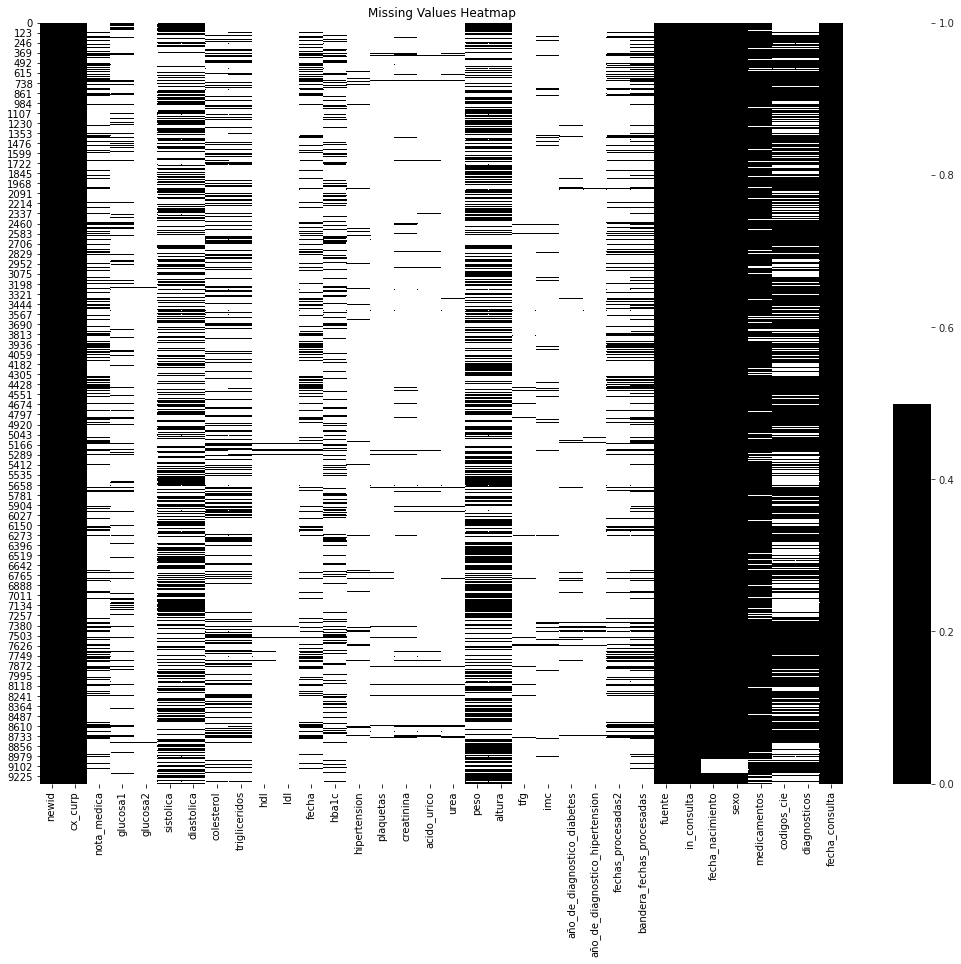

In [100]:
cols = df_eda.columns 
colours = ["#000000","#FFFFFF"]
f, ax = plt.subplots(figsize = (18,14))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

In [166]:
df_aux = df_eda[['newid','glucosa1','glucosa2','sistolica','diastolica','colesterol','trigliceridos','hdl',
                 'ldl','hba1c','plaquetas','creatinina','acido_urico','urea','peso','altura','tfg','imc',
                 'año_de_diagnostico_diabetes','año_de_diagnostico_hipertension','fechas_procesadas2',
                 'bandera_fechas_procesadas','in_consulta','fecha_nacimiento','sexo','fecha_consulta']].copy()

df_aux['sexo_n'] = ""
df_aux['edad'] = np.nan
df_aux['edad_c'] = ""
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   newid                            9315 non-null   object        
 1   glucosa1                         1302 non-null   float64       
 2   glucosa2                         17 non-null     float64       
 3   sistolica                        4533 non-null   float64       
 4   diastolica                       4533 non-null   float64       
 5   colesterol                       2311 non-null   float64       
 6   trigliceridos                    2373 non-null   float64       
 7   hdl                              117 non-null    float64       
 8   ldl                              85 non-null     float64       
 9   hba1c                            2072 non-null   float64       
 10  plaquetas                        258 non-null    float64    

In [167]:
for i in range(len(df_aux['newid'])): 
    if pd.isna(df_aux['fecha_nacimiento'][i]):
        df_aux['edad'][i] = np.nan        
    else: 
        df_aux['edad'][i] = df_aux['fecha_consulta'][i].year-\
                            df_aux['fecha_nacimiento'][i].year


In [168]:
for i in range(len(df_aux['newid'])):  
    
    if pd.isna(df_aux['glucosa1'][i]):        
        df_aux['glucosa1'][i] = 'NaN'        
    else:        
        df_aux['glucosa1'][i] = 'Value'
        
    if pd.isna(df_aux['glucosa2'][i]):
        df_aux['glucosa2'][i] = 'NaN'        
    else:        
        df_aux['glucosa2'][i] = 'Value'
    
    if pd.isna(df_aux['sistolica'][i]):        
        df_aux['sistolica'][i] = 'NaN'        
    else:        
        df_aux['sistolica'][i] = 'Value'
        
    if pd.isna(df_aux['diastolica'][i]):
        df_aux['diastolica'][i] = 'NaN'        
    else:        
        df_aux['diastolica'][i] = 'Value'
    
    if pd.isna(df_aux['colesterol'][i]):        
        df_aux['colesterol'][i] = 'NaN'        
    else:        
        df_aux['colesterol'][i] = 'Value'
        
    if pd.isna(df_aux['trigliceridos'][i]):
        df_aux['trigliceridos'][i] = 'NaN'        
    else:        
        df_aux['trigliceridos'][i] = 'Value'
        
    if pd.isna(df_aux['hdl'][i]):        
        df_aux['hdl'][i] = 'NaN'        
    else:        
        df_aux['hdl'][i] = 'Value'
        
    if pd.isna(df_aux['ldl'][i]):
        df_aux['ldl'][i] = 'NaN'        
    else:        
        df_aux['ldl'][i] = 'Value'
    
    if pd.isna(df_aux['hba1c'][i]):        
        df_aux['hba1c'][i] = 'NaN'        
    else:        
        df_aux['hba1c'][i] = 'Value'
        
    if pd.isna(df_aux['plaquetas'][i]):
        df_aux['plaquetas'][i] = 'NaN'        
    else:        
        df_aux['plaquetas'][i] = 'Value'
    
    if pd.isna(df_aux['creatinina'][i]):        
        df_aux['creatinina'][i] = 'NaN'        
    else:        
        df_aux['creatinina'][i] = 'Value'

    if pd.isna(df_aux['acido_urico'][i]):
        df_aux['acido_urico'][i] = 'NaN'        
    else:        
        df_aux['acido_urico'][i] = 'Value'
    
    if pd.isna(df_aux['urea'][i]):        
        df_aux['urea'][i] = 'NaN'        
    else:        
        df_aux['urea'][i] = 'Value'
        
    if pd.isna(df_aux['peso'][i]):
        df_aux['peso'][i] = 'NaN'        
    else:        
        df_aux['peso'][i] = 'Value'
    
    if pd.isna(df_aux['altura'][i]):        
        df_aux['altura'][i] = 'NaN'        
    else:        
        df_aux['altura'][i] = 'Value'
        
    if pd.isna(df_aux['tfg'][i]):
        df_aux['tfg'][i] = 'NaN'        
    else:        
        df_aux['tfg'][i] = 'Value'
  
    if pd.isna(df_aux['imc'][i]):        
        df_aux['imc'][i] = 'NaN'        
    else:        
        df_aux['imc'][i] = 'Value'
        
    if pd.isna(df_aux['año_de_diagnostico_diabetes'][i]):
        df_aux['año_de_diagnostico_diabetes'][i] = 'NaN'        
    else:        
        df_aux['año_de_diagnostico_diabetes'][i] = 'Value'
    
    if pd.isna(df_aux['año_de_diagnostico_hipertension'][i]):        
        df_aux['año_de_diagnostico_hipertension'][i] = 'NaN'        
    else:        
        df_aux['año_de_diagnostico_hipertension'][i] = 'Value'
        
    if pd.isna(df_aux['fechas_procesadas2'][i]):
        df_aux['fechas_procesadas2'][i] = 'NaN'        
    else:        
        df_aux['fechas_procesadas2'][i] = 'Value'
    
    if pd.isna(df_aux['bandera_fechas_procesadas'][i]):        
        df_aux['bandera_fechas_procesadas'][i] = 'NaN'        
    else:        
        df_aux['bandera_fechas_procesadas'][i] = 'Value'
        
    if pd.isna(df_aux['in_consulta'][i]):
        df_aux['in_consulta'][i] = 'NaN'        
    else:        
        df_aux['in_consulta'][i] = 'Value'
            
    if pd.isna(df_aux['fecha_nacimiento'][i]):        
        df_aux['fecha_nacimiento'][i] = 'NaN'        
    else:        
        df_aux['fecha_nacimiento'][i] = 'Value'
        
    if pd.isna(df_aux['sexo'][i]):
        df_aux['sexo_n'][i] = 'NaN'        
    else:        
        df_aux['sexo_n'][i] = 'Value'
        
    if pd.isna(df_aux['edad'][i]):
        df_aux['edad_c'][i] = 'NaN'        
    else:        
        df_aux['edad_c'][i] = 'Value'

In [169]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   newid                            9315 non-null   object        
 1   glucosa1                         9315 non-null   object        
 2   glucosa2                         8870 non-null   object        
 3   sistolica                        9315 non-null   object        
 4   diastolica                       9315 non-null   object        
 5   colesterol                       9309 non-null   object        
 6   trigliceridos                    9309 non-null   object        
 7   hdl                              8166 non-null   object        
 8   ldl                              8156 non-null   object        
 9   hba1c                            9309 non-null   object        
 10  plaquetas                        9186 non-null   object     

In [129]:
prop_g1 = df_aux.groupby(['glucosa1'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['glucosa2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['sistolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['diastolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['colesterol'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['trigliceridos'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hdl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['ldl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hba1c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['plaquetas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['creatinina'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['acido_urico'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['urea'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['peso'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['altura'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['tfg'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['imc'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['año_de_diagnostico_diabetes'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['año_de_diagnostico_hipertension'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['fechas_procesadas2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['bandera_fechas_procesadas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['in_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['fecha_nacimiento'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['sexo_n'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['edad_c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

,glucosa1,count,prop
0,NaN,8013,0.860225
1,Value,1302,0.139775


,glucosa2,count,prop
0,NaN,8853,0.998083
1,Value,17,0.001917


,sistolica,count,prop
0,NaN,4782,0.513366
1,Value,4533,0.486634


,diastolica,count,prop
0,NaN,4782,0.513366
1,Value,4533,0.486634


,colesterol,count,prop
0,NaN,6998,0.751746
1,Value,2311,0.248254


,trigliceridos,count,prop
0,NaN,6936,0.745085
1,Value,2373,0.254915


,hdl,count,prop
0,NaN,8049,0.985672
1,Value,117,0.014328


,ldl,count,prop
0,NaN,8071,0.989578
1,Value,85,0.010422


,hba1c,count,prop
0,NaN,7237,0.77742
1,Value,2072,0.22258


,plaquetas,count,prop
0,NaN,8928,0.971914
1,Value,258,0.028086


,creatinina,count,prop
0,NaN,8659,0.94263
1,Value,527,0.05737


,acido_urico,count,prop
0,NaN,8917,0.972728
1,Value,250,0.027272


,urea,count,prop
0,NaN,8991,0.978772
1,Value,195,0.021228


,peso,count,prop
1,Value,4995,0.536232
0,NaN,4320,0.463768


,altura,count,prop
1,Value,4993,0.536017
0,NaN,4322,0.463983


,tfg,count,prop
0,NaN,8954,0.979328
1,Value,189,0.020672


,imc,count,prop
0,NaN,8816,0.946837
1,Value,495,0.053163


,año_de_diagnostico_diabetes,count,prop
0,NaN,9018,0.968116
1,Value,297,0.031884


,año_de_diagnostico_hipertension,count,prop
0,NaN,9154,0.982716
1,Value,161,0.017284


,fechas_procesadas2,count,prop
0,NaN,7721,0.828878
1,Value,1594,0.171122


,bandera_fechas_procesadas,count,prop
0,NaN,6952,0.746644
1,Value,2359,0.253356


,in_consulta,count,prop
0,Value,9315,1.0


,fecha_nacimiento,count,prop
1,Value,9146,0.981857
0,NaN,169,0.018143


,sexo_n,count,prop
1,Value,9146,0.981857
0,NaN,169,0.018143


Distribución de las variables númericas

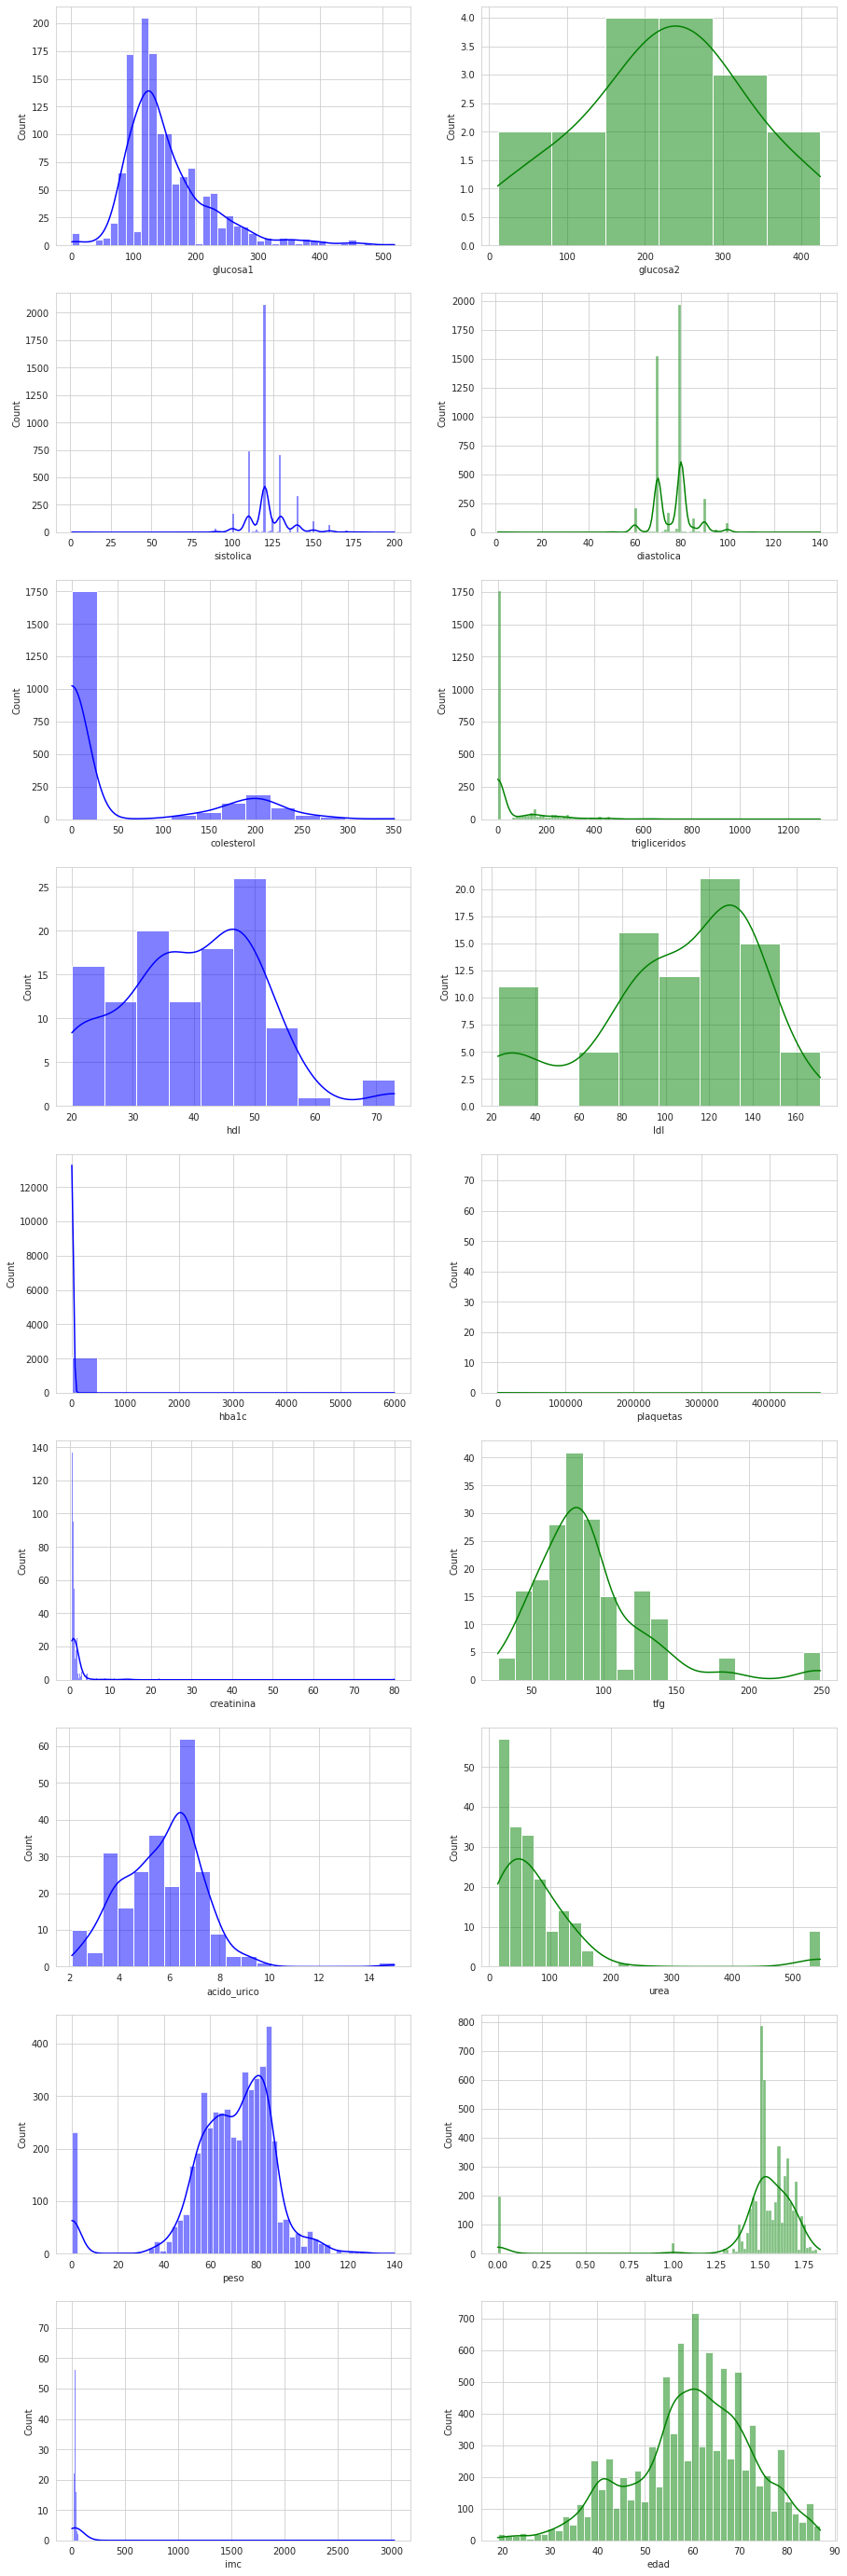

In [172]:
fig, axs = plt.subplots(9, 2, figsize=(15, 50))

sns.histplot(data = df_eda, x="glucosa1", kde=True, color="blue", ax=axs[0,0])
sns.histplot(data = df_eda, x="glucosa2", kde=True, color="green", ax=axs[0,1])
sns.histplot(data = df_eda, x="sistolica", kde=True, color="blue", ax=axs[1,0])
sns.histplot(data = df_eda, x="diastolica", kde=True, color="green", ax=axs[1,1])
sns.histplot(data = df_eda, x="colesterol", kde=True, color="blue", ax=axs[2,0])
sns.histplot(data = df_eda, x="trigliceridos", kde=True, color="green", ax=axs[2,1])
sns.histplot(data = df_eda, x="hdl", kde=True, color="blue", ax=axs[3,0])
sns.histplot(data = df_eda, x="ldl", kde=True, color="green", ax=axs[3,1])
sns.histplot(data = df_eda, x="hba1c", kde=True, color="blue", ax=axs[4,0])
sns.histplot(data = df_eda, x="plaquetas", kde=True, color="green", ax=axs[4,1])
sns.histplot(data = df_eda, x="creatinina", kde=True, color="blue", ax=axs[5,0])
sns.histplot(data = df_eda, x="tfg", kde=True, color="green", ax=axs[5,1])
sns.histplot(data = df_eda, x="acido_urico", kde=True, color="blue", ax=axs[6,0])
sns.histplot(data = df_eda, x="urea", kde=True, color="green", ax=axs[6,1])
sns.histplot(data = df_eda, x="peso", kde=True, color="blue", ax=axs[7,0])
sns.histplot(data = df_eda, x="altura", kde=True, color="green", ax=axs[7,1])
sns.histplot(data = df_eda, x="imc", kde=True, color="blue", ax=axs[8,0])
sns.histplot(data = df_aux, x="edad", kde=True, color="green", ax=axs[8,1])

plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.hist(df_eda['glucosa1'], 10)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()